# Coursework 1 - Supervised learning

**Replace CID in the file name with your CID**

# Outline


- [Task 1](#task-1): Regression <a name="index-task-1"></a>
  - [(1.1)](#task-11) Random Forest <a name="index-task-11"></a>
    - [(1.1.1)](#task-111) <a name="index-task-111"></a>
    - [(1.1.2)](#task-112) <a name="index-task-112"></a>
    - [(1.1.3)](#task-113) <a name="index-task-113"></a>
  - [(1.2)](#task-12) Multi-layer Perceptron <a name="index-task-12"></a>
    - [(1.2.1)](#task-121) <a name="index-task-121"></a>
    - [(1.2.2)](#task-122) <a name="index-task-122"></a>
    - [(1.2.3)](#task-123) <a name="index-task-123"></a>
- [Task 2](#task-2): Classification <a name="index-task-2"></a>
  - [(2.1)](#task-21) k-Nearest Neighbours <a name="index-task-21"></a>
    - [(2.1.1)](#task-211)  <a name="index-task-211"></a>
    - [(2.1.2)](#task-212) <a name="index-task-212"></a>
    - [(2.1.3)](#task-213) <a name="index-task-213"></a>
  - [(2.2)](#task-22) Logistic regression vs kernel logistic regression <a name="index-task-22"></a>
    - [(2.2.1)](#task-221) <a name="index-task-221"></a>
    - [(2.2.2)](#task-222) <a name="index-task-222"></a>
    - [(2.2.3)](#task-223) <a name="index-task-223"></a>



---



In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fixed random seed across entire notebook
random_seed = 2027072

In [3]:
# Frequently used standardise function
def standardise(X, X_train_=None):
    """Standardise features.

    Parameters:
        X (np.array): Feature matrix.
        X_train_ (np.array): An optional feature matrix to compute the statistics
            from before applying it to X. If None, just use X to compute the statistics.

    Returns:
        X_std (np.array): Standardised feature matrix
    """
    if X_train_ is None:
        X_train_ = X

    mu = np.mean(X_train_, axis=0, keepdims=True)
    sigma = np.std(X_train_, axis=0, keepdims=True)
    X_std = (X - mu) / sigma 
    return X_std

<a name="task-1"></a>

# (1) Task 1: Regression [(index)](#index-task-1)

Initial exploration of dataset

In [4]:
engineering_train = pd.read_csv('nanoelectrodes_capacitance_samples.csv')
engineering_test = pd.read_csv('nanoelectrodes_capacitance_test.csv')

In [5]:
engineering_train.describe()

Surface_Area ($m^2/g$)  Defect_Ratio  Doped_Nitrogen_Percentage  \
count               558.00000    558.000000                 558.000000   
mean                583.85586      1.148082                   4.270245   
std                 584.66617      0.349134                   2.791208   
min                  37.90000      0.380000                   0.000000   
25%                 193.50000      0.980000                   1.600000   
50%                 323.50000      1.050000                   4.200000   
75%                 710.00000      1.280000                   6.250000   
max                2276.60000      2.570000                  13.400000   

       Doped_Oxygen_Percentage  Doped_Sulfur_Percentage  \
count               558.000000               558.000000   
mean                 11.852001                 2.820992   
std                   6.458679                 4.686711   
min                   2.360000                 0.100000   
25%                   6.976667                 0.843333   
50%                  10.470000                 1.430000   
75%                  15.360000                 3.030000   
max                  35.150000                26.560000   

       Current_Density ($A/g$)  Capacitance ($\mu F / cm^2$)  \
count               558.000000                    558.000000   
mean                  6.172849                    203.748172   
std                   9.087580                     81.481091   
min                   0.100000                     25.000000   
25%                   1.000000                    150.000000   
50%                   3.000000                    200.000000   
75%                  10.000000                    253.097500   
max                 100.000000                    566.000000   

       Electrolyte_Concentration $[M]$  H9_Factor ($mL/g$)  \
count                       558.000000          558.000000   
mean                          5.185036           60.264176   
std                           1.849454           58.543100   
min                           0.250000            3.059294   
25%                           6.000000           21.678279   
50%                           6.000000           34.853242   
75%                           6.000000           72.554922   
max                           6.000000          232.076410   

       T5_Factor ($mL/g$)  Doped_Zinc_Percentage  Doped_Flourine_Percentage  \
count          558.000000             558.000000                 558.000000   
mean            33.939514              52.524367                  51.093572   
std             45.564777              17.503975                  15.993880   
min              0.334407               0.000000                   0.000000   
25%              7.717112              40.021762                  40.268750   
50%             16.648848              52.609386                  50.945091   
75%             50.666981              63.456698                  62.318507   
max            504.057887             100.000000                 100.000000   

       Doped_Carbon_Percentage  
count               558.000000  
mean                 44.853058  
std                  15.659737  
min                   0.000000  
25%                  33.229767  
50%                  44.975102  
75%                  55.667025  
max                 100.000000

In [6]:
engineering_train.shape

(558, 13)

In [7]:
engineering_test.describe()

Surface_Area ($m^2/g$)  Defect_Ratio  Doped_Nitrogen_Percentage  \
count               62.000000     62.000000                  62.000000   
mean               549.472903      1.095699                   3.781344   
std                489.411902      0.260161                   2.564753   
min                 39.050000      0.460000                   0.700000   
25%                223.450000      0.955000                   1.630000   
50%                370.400000      1.030000                   2.970000   
75%                676.000000      1.270000                   5.050000   
max               2217.600000      1.780000                  13.400000   

       Doped_Oxygen_Percentage  Doped_Sulfur_Percentage  \
count                62.000000                62.000000   
mean                 11.327258                 3.307527   
std                   5.695657                 5.546941   
min                   4.020000                 0.100000   
25%                   7.132500                 0.735833   
50%                   9.395000                 2.200000   
75%                  14.605000                 3.650000   
max                  28.410000                26.560000   

       Current_Density ($A/g$)  Capacitance ($\mu F / cm^2$)  \
count                62.000000                     62.000000   
mean                  6.935484                    213.710806   
std                  10.037734                     81.916586   
min                   0.200000                     46.000000   
25%                   1.000000                    152.750000   
50%                   3.000000                    210.000000   
75%                  10.000000                    258.750000   
max                  50.000000                    480.000000   

       Electrolyte_Concentration $[M]$  H9_Factor ($mL/g$)  \
count                        62.000000           62.000000   
mean                          5.012097           56.791949   
std                           2.043295           48.747142   
min                           0.250000            4.309532   
25%                           6.000000           24.535311   
50%                           6.000000           38.964856   
75%                           6.000000           68.911321   
max                           6.000000          224.177513   

       T5_Factor ($mL/g$)  Doped_Zinc_Percentage  Doped_Flourine_Percentage  \
count           62.000000              62.000000                  62.000000   
mean            37.467099              52.801159                  49.916809   
std             49.935390              17.015420                  15.408208   
min              1.863845               7.988711                  17.041922   
25%              8.003622              42.417148                  39.119569   
50%             18.831165              53.445428                  50.741189   
75%             51.657573              63.789404                  59.324326   
max            250.719607              87.422313                  87.912577   

       Doped_Carbon_Percentage  
count                62.000000  
mean                 45.718536  
std                  15.416384  
min                  11.871949  
25%                  36.252326  
50%                  45.208756  
75%                  55.801926  
max                  84.529863

In [8]:
engineering_test.shape

(62, 13)

Setting target column and preparing data

In [9]:
target_column = 'Capacitance ($\mu F / cm^2$)'
target_index = engineering_train.columns.get_loc(target_column)
target_index

6

In [10]:
y_train, X_train = engineering_train[target_column], engineering_train.drop(columns=[target_column],inplace=False)

y_test, X_test = engineering_test[target_column], engineering_test.drop(columns=[target_column],inplace=False)

Define a few metric functions for Task 1

In [11]:
def MSE(y_true, y_pred):
    """
    Return the MSE
    """
    return np.mean((y_true - y_pred)**2)

In [12]:
def r2_score(y, y_hat):
    """R^2 score to assess regression performance."""

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y = y.reshape(y_hat.shape)
    y_bar = y.mean()

    ss_tot = ((y - y_bar)**2).sum()
    ss_res = ((y - y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

In [13]:
# Columns for results dataframes in both 1.1 and 1.2 (used later)
results_columns1 = pd.MultiIndex.from_product([('MSE', r'$R^2$'), ('Train', 'Test')])

<a name="task-11"></a>

## (1.1) Random Forest [(index)](#index-task-11)

<a name="task-111"></a>

### (1.1.1) [(index)](#index-task-111)

We define our decision tree functions.

We adapt the functions from the coding task for regression with sample weights and categories dictionary removed, since we do not weight our samples and all our features are numerical.

We use the cost function for regression as stated in the lecture notes, and replace the majority vote for classification with a mean of the region for regression.

In [14]:
def cost_within_region(y):
    """Regression cost function.
    Arguments:
        y: vector of training labels
        
    Returns:
        float: cost
    """
    return np.sum((y-np.mean(y))**2)

In [15]:
def split_samples(X, y, column, value):
    """
    Return the split of data whose column-th feature is less than value, assuming column is numerical.

    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        column: the column of the feature for splitting.
        value: splitting threshold  the samples
    Returns:
        tuple(np.array, np.array, np.array): tuple of the left split data (X_l, y_l, w_l).
        tuple(np.array, np.array, np.array): tuple of the right split data (X_l, y_l, w_l)
    """

    left_mask = (X[:, column] < value)

    # Using the binary masks `left_mask`, we split X, y.
    X_l, y_l = X[left_mask, :], y[left_mask]
    X_r, y_r = X[~left_mask, :], y[~left_mask]

    return (X_l, y_l), (X_r, y_r)

In [16]:
def cost_value_threshold(X, y, column):
    """
    Calculate the cost based on `column` with the split that minimizes the cost within regions.
    Arguments:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
        column: the column of the feature for calculating. 0 <= column < D
    Returns:
        (float, float): the resulted cost and the corresponding value used in splitting.
    """

    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    cost_val, threshold = np.inf, None

    # split the values of i-th feature and calculate the cost
    for value in unique_vals:
        (X_l, y_l), (X_r, y_r) = split_samples(X, y, column, value)

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue

        new_cost = cost_within_region(y_l) + cost_within_region(y_r)
        if new_cost < cost_val:
              cost_val, threshold = new_cost, value

    return cost_val, threshold

In [17]:
def best_column_split(X, y):
    """
    Choose the best feature to split according to criterion.
    Args:
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
    Returns:
        (int, float): the best feature index and value used in splitting.
        If the feature index is None, then no valid split for the current Node.
    """

    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_cost = np.inf
    split_column = None
    split_val = np.nan

    for column in range(X.shape[1]):
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
        cost, current_split_val = cost_value_threshold(X, y, column)

        if cost < min_cost:
            # Keep track with:

            # 1. the current minimum cost,
            min_cost = cost

            # 2. corresponding column,
            split_column = column

            # 3. corresponding split threshold.
            split_val = current_split_val

    return split_column, split_val

In [18]:
def build_tree(X, y, feature_names, depth,  max_depth=10, min_samples_leaf=2):
    """Build the decision tree according to the data, assuming columns are numerical and samples are weighted equally.
    Args:
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'region_average': For leaf nodes, this stores the average outcome within the region. Otherwise, it is None.
          5. 'left': The left sub-tree with the same structure.
          6. 'right' The right sub-tree with the same structure.  
    """
    # include a clause for the cases where (i) no feature, (ii) all labels are the same, 
    # (iii) depth exceed, or (iv) X is too small
    if len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf:
        return {'region_average': np.mean(y)}

    split_column, split_val = best_column_split(X, y)

    # If no valid split at this node, use region mean.
    if split_column is None:
        return {'region_average': np.mean(y)}

    # Split samples (X, y, sample_weights) given column and split-value.
    (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_column, split_val)
    return {
        'feature_name': feature_names[split_column],
        'feature_index': split_column,
        'value': split_val,
        'region_average': None,
        'left': build_tree(X_l, y_l, feature_names, depth + 1, max_depth, min_samples_leaf),
        'right': build_tree(X_r, y_r, feature_names, depth + 1, max_depth, min_samples_leaf)
    }

Train our decision tree.

In [19]:
def train_tree(X, y):
    """
    Build the decision tree according to the training data.
    Args:
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,).
    """

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    return build_tree(X, y, feature_names, depth=1, max_depth=10, min_samples_leaf=10)

In [20]:
# Train decision tree
tree = train_tree(X_train, y_train)

Predict using our tree.

In [21]:
def regression_estimate(tree, x):
    """
    Calculation regression estimate for a single sample with the fitted decision tree.
    Args:
        x: ((pd.Dataframe) a single sample features, of shape (D,).
    Returns:
        (int): predicted testing sample label.
    """
    if tree['region_average'] is not None:
        return tree['region_average']
    else:

        if x[tree['feature_index']] < tree['value']:
            # go to left branch
            return regression_estimate(tree['left'], x) 
        else:
            # go to right branch
            return regression_estimate(tree['right'], x)  

In [22]:
def predict_dt(tree, X):
    """
    Predict regression results for X.
    Args:
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """
    if len(X.shape) == 1:
        return regression_estimate(tree, X)
    else:
        return np.array([regression_estimate(tree, x) for x in X])

In [23]:
# Predict using our decision tree
y_pred_tree_train = predict_dt(tree, X_train.to_numpy())
y_pred_tree = predict_dt(tree, X_test.to_numpy())

MSE_tree = MSE(y_test, y_pred_tree)
R2_tree = r2_score(y_test.to_numpy(), y_pred_tree)

### Results

In [24]:
results_11 = pd.DataFrame(columns=results_columns1)
results_11.loc['Decision Tree'] = [MSE(y_train, y_pred_tree_train), MSE(y_test, y_pred_tree),
                                   r2_score(y_train.to_numpy(), y_pred_tree_train), R2_tree]
results_11

MSE                  $R^2$          
                     Train         Test     Train      Test
Decision Tree  1654.405151  3369.567107  0.750364  0.489622

The **MSE** is lower on the training data, and the $R^2$ is higher on the training data as expected. 

The difference between the **MSE** for the training and testing data is large, suggesting the model may be overfitting the training data. It has learnt to predict the training data well but doesn't generalise well to unseen data. 

The difference in $R^2$ from `0.75` to `0.49` is also quite significant, as it shows much less variance is captured by the model on the test data, supporting our previous conclusion with the **MSE** that the model doesn't generalise well. 

<a name="task-112"></a>

### (1.1.2) [(index)](#index-task-112)

We define functions for the random forest as seen in coding tasks, adapt them for regression and remove sample weights and categorical dictionary.

We define a separate train function for bagging without feature bagging.

In [25]:
def best_column_split_rf(n_features, X, y):
    """
    Choose the best feature to split according to criterion, with added sampling step for feature bagging.
    Args:
        n_features: number of sampled features.
        X: training features, of shape (N, p).
        y: vector of training labels, of shape (N,).
    Returns:
        (float, int, float): the minimized cost function, the best feature index and value used in splitting.
    """

    # The added sampling step.
    p = X.shape[1]
    columns = np.random.choice(list(np.arange(p)), n_features, replace=False)
    
    # Initialize `split_column` to None, so if None returned this means there is no valid split at the current node.
    min_cost = np.inf
    split_column = None
    split_val = np.nan

    for column in columns:
        # skip column if samples are not separable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue
            
        cost, current_split_val = cost_value_threshold(X, y, column)
        if cost < min_cost:
            min_cost = cost
            split_column = column
            split_val = current_split_val
            
    return min_cost, split_column, split_val

In [26]:
def build_tree_rf(n_features, X, y, feature_names, depth,  max_depth=10, min_samples_leaf=2):
    """Build the decision tree with feature bagging according to the data, 
    assuming columns are numerical and samples are weighted equally.
    Args:
        n_features: number of sampled features for feature bagging.
        X: (np.array) training features, of shape (N, p).
        y: (np.array) vector of training labels, of shape (N,).
        feature_names (list): record the name of features in X in the original dataset.
        depth (int): current depth for this node.
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split.
          2. 'feature_index': The column index of the split.
          3. 'value': The value used for the split.
          4. 'region_average': For leaf nodes, this stores the average outcome within the region. Otherwise, it is None.
          5. 'left': The left sub-tree with the same structure.
          6. 'right' The right sub-tree with the same structure.  
    """
    # include a clause for the cases where (i) no feature, (ii) all labels are the same, 
    # (iii) depth exceed, or (iv) X is too small
    if len(np.unique(y))==1 or depth>=max_depth or len(X)<=min_samples_leaf:
        return {'region_average': np.mean(y)}
    
    else:
        cost, split_column, split_val = best_column_split_rf(n_features, X, y) 

        # If cost is infinity, it means that samples are not separable by the sampled features.
        if cost == np.inf:
            return {'region_average': np.mean(y)}
        (X_l, y_l), (X_r, y_r) = split_samples(X, y, split_column, split_val)
        return {
            'feature_name': feature_names[split_column],
            'feature_index': split_column,
            'value': split_val,
            'region_average': None,
            'left': build_tree_rf(n_features, X_l, y_l, feature_names, depth + 1, max_depth, min_samples_leaf),
            'right': build_tree_rf(n_features, X_r, y_r, feature_names, depth + 1, max_depth, min_samples_leaf)
        }

Train function for bagging without feature bagging.

We return the sample indices for importance factors in 1.1.3

In [27]:
def train_rf(B, n_features, X, y, max_depth=10, min_samples_leaf=10, seed=0):
    """
    Train a Random forest.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1.
    """
    
    # Seed for sampling
    np.random.seed(seed)
 
    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []
    bag_indices = []
    
    for _ in range(B):
        # Sample the training_indices (with replacement)
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        bag_indices.append(sample) # Bags are stored for OOB 
        tree = build_tree_rf(n_features, X_sample, y_sample,
                             feature_names, depth=1, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        trees.append(tree)

    return trees, bag_indices

Train function for bagging without feature bagging.

In [28]:
def train_bagging(B, X, y, max_depth=10, min_samples_leaf=10, seed=0):
    """
    Train using bagging from Decision Trees.
    Args:
        B: number of decision trees.
        X: (pd.Dataframe) training features, of shape (N, p). Each X[i] is a training sample.
        y: (pd.Series) vector of training labels, of shape (N,).
    Returns:
        (list): list of trees trained.
        (list): list of arrays of sample indices for tree trained.
    """
    
    # Seed for sampling
    np.random.seed(seed)
 
    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        # Sample the training_indices (with replacement)
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        tree = build_tree(X_sample, y_sample,
                          feature_names, depth=1, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        trees.append(tree)

    return trees

Predict function for an ensemble of trees or random forest.

In [29]:
def predict_trees(trees, X):
    """
    Predict regression results for X using trees.
    Args:
        trees: A trained tree ensemble/random forest.
        X: (pd.Dataframe) testing sample features, of shape (N, p).
    Returns:
        (np.array): predicted testing sample labels, of shape (N,).
    """

    if len(X.shape) == 1:
        # if we have one sample
        return np.mean([regression_estimate(tree, X) for tree in trees])
    else:
        # if we have multiple samples
        return np.array([np.mean([regression_estimate(tree, x) for tree in trees]) for x in X])

5-fold cross-validation to find optimal B (number of trees)

In [30]:
def cross_val_evaluate_rf(X_train, y_train, folds, B, n_features, max_depth=10, min_samples_leaf=10, seed=0):
    """
    Evaluate a random forest using cross validation and MSE as the score.
    Args:
        X_train: Training sample
        y_train: Training labels
        folds: List of arrays containing indices for each fold
        B: Number of trees to evaluate at
        n_features: Number of features for random forest
        max_depth, min_samples_leaf: hyperparameters for rf
    Returns:
        MSE score
    """

    val_scores = []
    
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(X_train.shape[0])) - set(val_indices))

        X_t = X_train.loc[train_indices]
        y_t = y_train.loc[train_indices]

        # define the validation set
        X_val = X_train.loc[val_indices]
        y_val = y_train.loc[val_indices]

        # train the model
        rf,_ = train_rf(B, n_features, X_t, y_t, max_depth=max_depth, min_samples_leaf=min_samples_leaf, seed=seed)

        # evaluate using MSE
        y_pred = predict_trees(rf, X_val.to_numpy())
        val_score = MSE(y_val, y_pred)
        val_scores.append(val_score)

    return np.mean(val_scores)

In [31]:
def train_rf_bestB(B_vals, n_features, X_train, y_train, num_folds, max_depth=10, min_samples_leaf=10, seed=0):
    """
    Train a random forest using best B by cross-validation.
    Args:
        B_vals: List of B values to evaluate B at.
        n_features: Number of features to use for feature bagging
        X_train: Training sample
        y_train: Training labels
        num_folds: Number of folds to use for cross validation
        max_depth, min_samples_leaf: hyperparameters for rf
        seed: seed for fold shuffling and random forests
    Returns:
        MSE score
    """
    best_B, min_score = None, np.inf
    
    np.random.seed(seed)
    folds = np.array_split(np.random.permutation(X_train.shape[0]), 5)
    
    scores = []
    for B in B_vals:
        score = cross_val_evaluate_rf(X_train, y_train, folds, B, n_features, 
                                      max_depth=max_depth, 
                                      min_samples_leaf=min_samples_leaf, 
                                      seed=seed+1) # seed is altered to prevent any dependencies in sampling
        scores.append(score)
        
        # If MSE score is lower, update best B
        if score < min_score:
            best_B = B
            min_score = score
            
        print(f'CV_MSE@B={B}: {score:.3f}')
    
    # Train the forest using best B
    rf, _ = train_rf(best_B, n_features, X_train, y_train, max_depth=max_depth, min_samples_leaf=min_samples_leaf, seed=seed)
    
    return rf, best_B, scores


Random Forest training for optimal B

This is computationally intensive so we choose 5 potential B values within a wide range.

In [32]:
# Train random forest for a range of B values (at least 5)
B_values = np.arange(10, 110, 20)
num_features = int(X_train.shape[1]/3) # rule of thumb
rf, best_B, B_scores = train_rf_bestB(B_values, num_features, X_train, y_train, 5, 
                                    max_depth=10, min_samples_leaf=10, seed=random_seed)

CV_MSE@B=10: 3562.252
CV_MSE@B=30: 3287.988
CV_MSE@B=50: 3178.269
CV_MSE@B=70: 3180.968
CV_MSE@B=90: 3198.037


Text(0, 0.5, 'MSE Score')

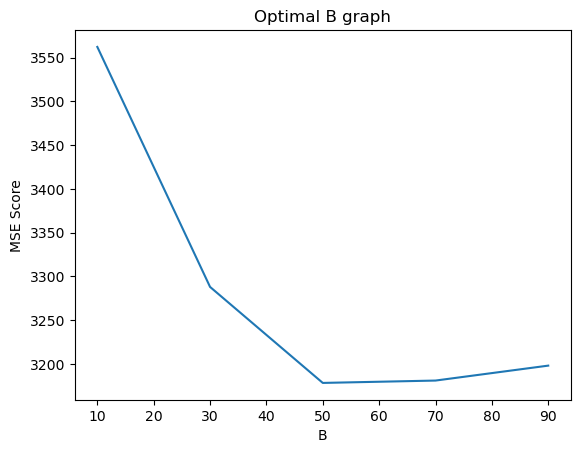

In [33]:
# Plot our B values and respective scores
plt.plot(B_values, B_scores)
plt.title('Optimal B graph')
plt.xlabel('B')
plt.ylabel('MSE Score')

In [34]:
# Our optimal B
print('Optimal B (number of trees): ', best_B)

Optimal B (number of trees):  50


In [35]:
# Predict using our random forest
y_pred_rf_train = predict_trees(rf, X_train.to_numpy())
y_pred_rf = predict_trees(rf, X_test.to_numpy())

MSE_rf = MSE(y_test, y_pred_rf)
R2_rf = r2_score(y_test.to_numpy(), y_pred_rf)

results_11.loc['Random Forest'] = [MSE(y_train, y_pred_rf_train), MSE_rf, 
                                   r2_score(y_train.to_numpy(), y_pred_rf_train), R2_rf]

Bagging training

In [36]:
# Train with bagging using best B from random forest
bagging = train_bagging(best_B, X_train, y_train, max_depth=10, min_samples_leaf=10, seed=random_seed)

### Results

In [37]:
# Predict using our ensemble of trees from bagging
y_pred_bagging_train = predict_trees(bagging, X_train.to_numpy())
y_pred_bagging = predict_trees(bagging, X_test.to_numpy())

MSE_bagging = MSE(y_test, y_pred_bagging)
R2_bagging = r2_score(y_test.to_numpy(), y_pred_bagging)

results_11.loc['Bagging'] = [MSE(y_train, y_pred_bagging_train), MSE_bagging, 
                             r2_score(y_train.to_numpy(), y_pred_bagging_train), R2_bagging]
results_11

MSE                  $R^2$          
                     Train         Test     Train      Test
Decision Tree  1654.405151  3369.567107  0.750364  0.489622
Random Forest  1225.814138  3046.742141  0.815035  0.538519
Bagging        1066.693673  3060.993922  0.839045  0.536360

By applying bagging and feature bagging, we improve the performance of the model on both the training and test data. Bagging has the lowest **MSE** and highest $R^2$ on the training set, indicating it fits the training data best, whereas the random forest performs slightly better on the test data, suggesting it may be better at generalising. This may be due to its ability to reduce certain predictors from dominating the model and also decrease correlations between features, hence we improve variance reduction.

All three models appear to be prone to overfitting shown by the large decrease in performance between the training data than the test data. The tree ensembles manage to perform better, with more of the variance being explained by the models as indicated by the $R^2$.

<a name="task-113"></a>

### (1.1.3) [(index)](#index-task-113)

### Best hyperparameters

We search for an optimal combination of max-depth and min-samples-leaf, then train our new optimised random forest with these hyperparameters. This process is quite computationally intensive, so we use a small range of values to search within.

In [38]:
def train_rf_besthyper(max_depth_vals, min_samples_leaf_vals, B, n_features, X_train, y_train, num_folds, seed=0):
    """
    Train a random forest using best max-depth and min-samples-leaf by cross-validation.
    Args:
        max_depth_vals: List of values to evaluate max-depth at.
        min_samples_leaf_vals: List of values to evalate min-samples-leaf at.
        B: Number of trees
        n_features: Number of features to use for feature bagging
        X_train: Training sample
        y_train: Training labels
        num_folds: Number of folds to use for cross validation
        seed: seed for fold shuffling and random forests
    """
    best_max_depth, best_min_samples_leaf, min_score = None, None, np.inf
    
    np.random.seed(seed)
    folds = np.array_split(np.random.permutation(X_train.shape[0]), 5)
    scores = []
    
    # Iterating through each hyperparameter
    for max_depth in max_depth_vals:
        scores_inner = []
        for min_samples_leaf in min_samples_leaf_vals:
            score = cross_val_evaluate_rf(X_train, y_train, folds, B, n_features, max_depth, min_samples_leaf, seed)
            if score < min_score:
                best_max_depth = max_depth
                best_min_samples_leaf = min_samples_leaf
                min_score = score
            scores_inner.append(score)
            print(f'CV_MSE@md={max_depth},msl={min_samples_leaf}: {score:.3f}')
        scores.append(scores_inner)
    
    scores = np.array(scores)
    
    # Training our random forest with optimised hyperparameters, we return bag indices for OOB importance factors
    rf, bag_indices = train_rf(B, n_features, X_train, y_train, 
                               max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
    
    return rf, best_max_depth, best_min_samples_leaf, scores, bag_indices
    

In [39]:
# Seach for optimal values of max_depth and min_samples_leaf and train a rf using these values (using previous optimal B)
max_depth_vals = np.arange(5, 55, 10)
min_samples_leaf_vals = np.arange(2, 12, 2)

n_features = int(X_train.shape[1]/3) # Rule of thumb
rf_best, best_max_depth, best_min_samples_leaf, scores_rfhyper, bag_indices = train_rf_besthyper(max_depth_vals, 
                                                                                                 min_samples_leaf_vals, 
                                                                                                 best_B, 
                                                                                                 n_features, X_train, 
                                                                                                 y_train, 5, seed=random_seed)


CV_MSE@md=5,msl=2: 4516.431
CV_MSE@md=5,msl=4: 4633.977
CV_MSE@md=5,msl=6: 4623.760
CV_MSE@md=5,msl=8: 4610.871
CV_MSE@md=5,msl=10: 4580.417
CV_MSE@md=15,msl=2: 2978.177
CV_MSE@md=15,msl=4: 2778.911
CV_MSE@md=15,msl=6: 2968.415
CV_MSE@md=15,msl=8: 3002.853
CV_MSE@md=15,msl=10: 2971.397
CV_MSE@md=25,msl=2: 2861.855
CV_MSE@md=25,msl=4: 2870.958
CV_MSE@md=25,msl=6: 3007.295
CV_MSE@md=25,msl=8: 2994.467
CV_MSE@md=25,msl=10: 2913.853
CV_MSE@md=35,msl=2: 2872.496
CV_MSE@md=35,msl=4: 2859.546
CV_MSE@md=35,msl=6: 3003.357
CV_MSE@md=35,msl=8: 3009.473
CV_MSE@md=35,msl=10: 2913.853
CV_MSE@md=45,msl=2: 2872.496
CV_MSE@md=45,msl=4: 2859.546
CV_MSE@md=45,msl=6: 3003.357
CV_MSE@md=45,msl=8: 3009.473
CV_MSE@md=45,msl=10: 2913.853


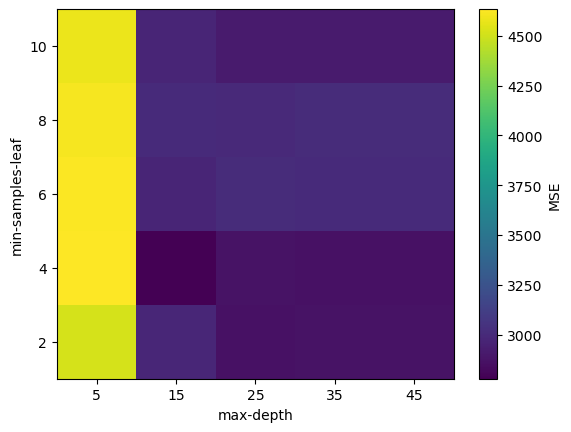

In [40]:
# Plot our hyperparameter combinations and respective scores
x_indices = np.arange(len(max_depth_vals))
y_indices = np.arange(len(min_samples_leaf_vals))

plt.pcolormesh(x_indices, y_indices, scores_rfhyper.T, cmap='viridis')
plt.colorbar(label='MSE')

plt.xticks(x_indices, max_depth_vals)
plt.yticks(y_indices, min_samples_leaf_vals)

plt.xlabel('max-depth')
plt.ylabel('min-samples-leaf')
plt.show()

In [41]:
# Our optimal max-depth and min-samples-leaf
print(f'Optimal (max-depth, min-samples-leaf): ({best_max_depth}, {best_min_samples_leaf})')

Optimal (max-depth, min-samples-leaf): (15, 4)


We observe that having a lower min-samples-leaf tends to reduce the error. Increasing best-max-depth also reduces the error to an extent, possibly at the point where the model begins to overfit the training data. This gives us our optimal values of max-depth and min-samples-leaf.

In [42]:
# Predict using our optimal random forest
y_pred_bestrf_train = predict_trees(rf_best, X_train.to_numpy())
y_pred_bestrf = predict_trees(rf_best, X_test.to_numpy())

results_11.loc['Random Forest Opt'] = [MSE(y_train, y_pred_bestrf_train), MSE(y_test, y_pred_bestrf), 
                                       r2_score(y_train.to_numpy(), y_pred_bestrf_train),
                                       r2_score(y_test.to_numpy(), y_pred_bestrf)]
results_11

MSE                  $R^2$          
                         Train         Test     Train      Test
Decision Tree      1654.405151  3369.567107  0.750364  0.489622
Random Forest      1225.814138  3046.742141  0.815035  0.538519
Bagging            1066.693673  3060.993922  0.839045  0.536360
Random Forest Opt   503.363790  2766.144723  0.924047  0.581020

By optimising our hyperparameters, our random forest model performance has significantly improved as the hyperparameters have been adapted to perform better on our validation samples from our training set.

### Feature Importance

We use the OOB samples to estimate the importance factor in a similar way to lecture slides. We calculate the **MSE** on the predicted OOB samples for each tree in the optimised random forest, then shuffle each column and calculate the **MSE** again, taking the increase in **MSE** from the permutation of the column as the importance metric, and average across all trees in the forest.

In [43]:
def feature_importance_oob(X, y, trees, bags, seed=0):
    """
    Use OOB samples to estimate performance factors of each feature.
    Args:
        X: Training sample
        y: Training label
        trees: List of trees trained with bagging
        bags: List of samples the trees were trained on
        seed: Seed for permutation of columns
    Returns:
        (np.array): Importance factors of each feature using MSE
    """
    
    N, p = X.shape
    training_indices = np.arange(N)
    
    np.random.seed(seed)
    
    importance_table = np.zeros((len(trees), p))
    
    for i, (tree, bag) in enumerate(zip(trees, bags)):
        
        oob_indices = list(set(training_indices) - set(bag)) # get OOB indices
        
        # get OOB samples
        X_oob = X[oob_indices, :]
        y_oob = y[oob_indices]
                
        # OOB MSE        
        y_pred = predict_dt(tree, X_oob)
        mse_oob = MSE(y_oob, y_pred)
        
        mse_perm = []
        
        for j in range(p):
            
            # Permute our column j indices
            oob_perm = np.random.permutation(X_oob.shape[0])
            X_oob_perm = X_oob.copy()
            X_oob_perm[:, j] = X_oob[oob_perm, j]
            
            # OOB MSE with feature j permuted
            y_pred_perm = predict_dt(tree, X_oob_perm)
            
            # Calculate and store importance
            importance = MSE(y_oob, y_pred_perm) - mse_oob # importance is increase in MSE from permutation of columns
            importance_table[i,j] = importance
    
    return np.mean(importance_table, axis=0) # Average over trees

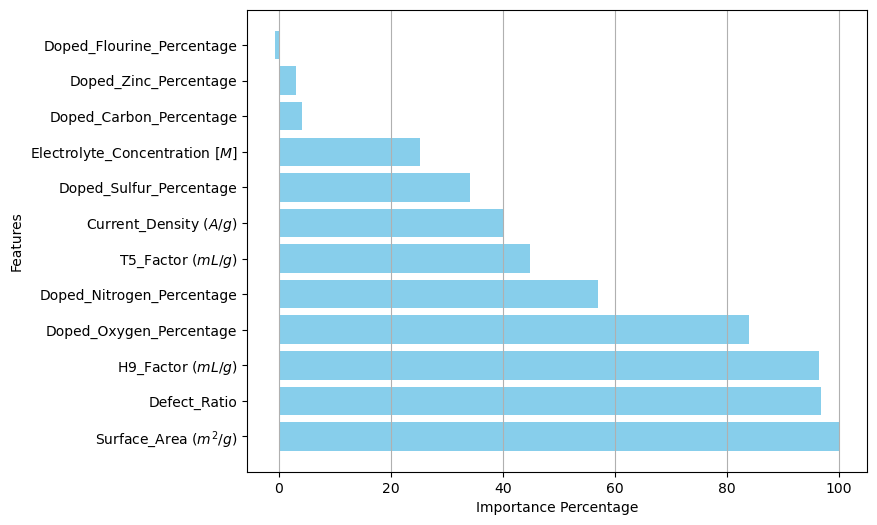

In [44]:
# Calculating importance metrics with OOB samples from earlier and our optimised random forest
importances = feature_importance_oob(X_train.to_numpy(), y_train.to_numpy(), rf_best, bag_indices, seed=random_seed)

max_importance = max(importances)
importance_percentages = importances/max_importance * 100

# Sorting for our plot
sorted_indices = np.argsort(importances)
features_sorted = X_train.columns[sorted_indices]
importance_percentages_sorted = importance_percentages[sorted_indices]

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.barh(features_sorted, importance_percentages_sorted, color='skyblue')
plt.xlabel('Importance Percentage')
plt.ylabel('Features')
plt.grid(axis='x')
plt.gca().invert_yaxis() 
plt.show()

We observe the factors contributing the most to the prediction of electrical capacity are `Surface Area` (which should be directly proportional to capacitance), `Defect Ratio`, `H9 Factor`, and `Doped Oxygen Percentage`. We also observe some of the factors have very low importance: `Doped Zinc Percentage`, `Doped Flourine Percentage`, `Doped Carbon Percentage`. These will have added noise to the model, which can lead to overfitting, especially in the decision tree.



---



<a name="task-12"></a>

## (1.2) Multi-layer Perceptron [(index)](#index-task-12)

<a name="task-121"></a>

### (1.2.1) [(index)](#index-task-121)

We define our MLP functions, mostly imported from the coding task. We introduce the new activation function and calculate its derivative for the grad_activation function:

$$
\sigma'(a)=\frac{\log(|a|+1)}{a^2+1} + \frac{a}{|a|}\frac{tan^{-1}(a)}{|a|+1}
$$

We add these to our lookup tables.

In [45]:
def dense(X, W, b):
    """Full-connected MLP layer.

    Parameters:
        X (np.ndarray): K x h_in array of inputs, where K is the batch size and h_in if the input features dimension.
        W (np.ndarray): h_out x h_in array for kernel matrix parametersm, where h_out is the output dimension.
        b (np.ndarray): Length h_out 1-D array for bias parameters

    Returns:
        a (np.ndarray): K x h_out array of pre-activations
    """
    a = np.vstack([W @ x + b for x in X])
    return a

In [46]:
def activation(a):
    """ Activation function as defined in question.
    """
    return np.arctan(a)*np.log(np.abs(a) + 1)

def grad_activation(a):
    """ Grad of our activation function.
    """
    return np.log(np.abs(a) + 1)/(a**2 + 1) + np.sign(a)*np.arctan(a)/(np.abs(a)+1)

In [47]:
# A lookup table for activation functions by their names.
activation_table = {
    "activation": activation,
    # Identity function.
    "identity": lambda x: x
}

# A lookup table for gradient of activation functions by their names.
grad_activation_table = {
    "activation": grad_activation,
    # Identity function gradient.
    "identity": lambda x: np.ones_like(x)
}

class MLP:
    """
    This class represents a Multi-Layer Perceptron (MLP), that we are going
    to use to encapsulate two components:
        1. layers: the sequence of layers, where each layer is stored in
            a dictionary in the format {"W": np.ndarray, "b": np.ndarray},
            where "W" points to the weights array, and "b" points to
            the bias vector.
        2. rng: a pseudo random number generator (RNG) initialised to generate
            the random weights in a reproducible manner between different
            runtime sessions.
    This class is also shipped with methods that perform essential operations
    with a MLP, including:
        - add_layers: which creates a new layer with specified dimensions.
        - predict: applies the MLP forward pass to make predictions and produces
            a computational graph for the forward pass that can be used to
            compute gradients using backpropagation algorithm.
        in addition to other light functions that return simple statistics about
        the MLP.
    """
    def __init__(self, seed=42):
        self.layers = []
        self.rng = np.random.default_rng(seed)

    def n_parameters(self):
        """Return the total number of parameters of weights and biases."""
        return sum(l["b"].size + l["W"].size for l in self.layers)

    def n_layers(self):
        """Return current number of MLP layers."""
        return len(self.layers)

    def layer_dim(self, index):
        """Retrieve the dimensions of the MLP layer at `index`."""
        return self.layers[index]["W"].shape

    def add_layer(self, in_dim, out_dim, activation="identity"):
        """Add fully connected layer to MLP.

        Parameters:
            in_dim (int): The output dimension of the layer.
            out_dim (int): The input dimension of the layer.
            activation (str): The activation function name.
        """
        # check if input-dimension matches output-dimension of previous layer
        if self.n_layers() > 0:
            last_out_dim, _ = self.layer_dim(-1)
            assert in_dim == last_out_dim, \
            f"Input-dimension {in_dim} does not match output-dimension {last_out_dim} of previous layer."

        # the first layer, in our convention illustrated, does not apply activation on the input features X.
        if self.n_layers() == 0:
            assert activation == "identity", \
            "Should not apply activations on the input features X, use Identity function for the first layer."


        # store each layer as a dictionary in the list, as shown in the
        # attached diagram.
        self.layers.append({
            # only for debugging.
            "index": len(self.layers),
            # apply Glorot initialisation for weights.
            "W": self.rng.normal(size=(out_dim, in_dim)) * np.sqrt(2. / (in_dim + out_dim)),
            # initialise bias vector with zeros.
            "b": np.zeros(out_dim),
            # store the activation function (as string)
            "activation": activation
        })

    def predict(self, X):
        """Apply the forward pass on the input X and produce prediction and the
        forward computation graph.

        Parameters:
            X (np.ndarray): Feature matrix.

        Returns:
            (np.ndarray, List[Dict[str, np.ndarray]]): A tuple of the
            predictions and the computation graph as a sequence of intermediate
            values through the MLP, specifically each layer will have a corresponding
            intermediate values {"a": np.ndarray, "h": np.ndarray}, as shown in the
            attached diagram above.
        """
        # We assume that we work with a batch of examples (ndim==2).
        if X.ndim == 1:
            # If one example passed, add a dummy dimension for the batch.
            X = X.reshape(1, -1)

        # store pre- and post-activations in list
        forward_pass = [{"index": 0, "a": X, "h": X}]

        # iterate through hidden layers
        for k in range(1, len(self.layers)):
            # compute pre-activations
            a = dense(forward_pass[k - 1]["h"], self.layers[k - 1]["W"], self.layers[k - 1]["b"])
            activation = activation_table[self.layers[k]["activation"]]
            forward_pass.append({"index": k, "a" : a, "h" : activation(a)})

        y_hat = dense(forward_pass[-1]["h"], self.layers[-1]["W"], self.layers[-1]["b"])
        # predicted target is output of last layer
        return y_hat, forward_pass

In [48]:
def mse_loss(y_true, y_pred):
    """Compute MSE-loss

    Parameters:
        y_true: ground-truth array, with shape (K, )
        y_pred: predictions array, with shape (K, )

    Returns:
        loss (float): MSE-loss
    """
    assert y_true.size == y_pred.size, "Ground-truth and predictions have different dimensions."

    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    return np.mean((y_true - y_pred)**2, keepdims=True)

In [49]:
def grad_mse_loss(y_true, y_pred):
    """Compute gradient of MSE-loss

    Parameters:
        y_true: ground-truth values, shape: (K, ).
        y_pred: prediction values, shape: (K, ).

    Returns:
        grad (np.ndarray): Gradient of MSE-loss, shape: (K, ).
    """
    # Adjustment to avoid subtraction between (K,) and (1, K) arrays.
    y_true = y_true.reshape(y_pred.shape)

    return 2.0 * (y_pred - y_true) / y_true.size

In [50]:
def backpropagate(layers, forward_pass, delta_output):
    """
    Apply the backpropagation algorithm to the MLP layers to compute the gradients starting from
    the output layer to the input layer, and starting the chain rule from the
    partial derivative of the loss function w.r.t the predictions $\hat{y}$. The

    Parameters:
        layers (List[Dict[str, np.ndarray]]): The MLP sequence of layers, as shown in the diagrams.
        forward_pass (List[Dict[str, np.ndarray]]): The forward pass intermediate values for
            each layer, representing a computation graph.
        delta_output (np.ndarray): the partial derivative of the loss function w.r.t the
            predictions $\hat{y}$, has the shape (K, 1), where K is the batch size.
    Returns:
        (List[Dict[str, np.ndarray]]): The computed gradient using a structure symmetric the layers, as shown
            in the diagrams.

    """
    # Create a list that will contain the gradients of all the layers.
    delta = delta_output

    assert len(layers) == len(forward_pass), "Number of layers is expected to match the number of forward pass layers"

    # Iterate on layers backwardly, from output to input.
    # Calculate gradients w.r.t. weights and biases of each level and store in list of dictionaries.
    gradients = []
    for layer, forward_computes in reversed(list(zip(layers, forward_pass))):
        assert forward_computes["index"] == layer["index"], "Mismatch in the index."

        h = forward_computes["h"]
        assert delta.shape[0] == h.shape[0], "Mismatch in the batch dimension."


        gradients.append({"W" : delta.T @ h,
                          "b" : delta.sum(axis=0)})

        # Update the delta for the next iteration
        grad_activation_f = grad_activation_table[layer["activation"]]
        grad_activation = grad_activation_f(forward_computes["a"])

        # Calculate the delta for the backward layer.
        delta = np.stack([np.diag(gi) @ layer["W"].T @ di
                           for (gi, di) in zip(grad_activation, delta)])


    # Return now ordered list matching the layers.
    return list(reversed(gradients))

In [51]:
def sgd_step(X, y, mlp, learning_rate = 1e-3):
    """
    Apply a stochastic gradient descent step using the sampled batch.
    Parameters:
        X (np.ndarray): The input features array batch, with dimension (K, D).
        y (np.ndarray): The ground-truth of the batch, with dimension (K, 1).
        learning_rate (float): The learning rate multiplier for the update steps in SGD.
    Returns:
        (List[Dict[str, np.ndarray]]): The updated layers after applying SGD.
    """
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_mse_loss(y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)

    # mlp.layers and gradients are symmetric, as shown in the figure.
    updated_layers = []
    for layer, grad in zip(mlp.layers, gradients):
        W = layer["W"] - learning_rate * grad["W"]
        b = layer["b"] - learning_rate * grad["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
    return updated_layers

In [52]:
from tqdm.notebook import tqdm # progress bar

In [53]:
def sgd(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=10, minibatchsize=1, seed=42):
    """
    Run the Stochastic Gradient Descent (SGD) algorithm to optimise the parameters of MLP model to fit it on
    the training data using MSE loss.

    Parameters:
        X_train (np.ndarray): The training data features, with shape (|D_train|, D).
        y_train (np.ndarray): The training data ground-truth, with shape (|D_train|, 1).
        X_test (np.ndarray): The testing data features, with shape (|D_test|, D).
        y_test (np.ndarray): The testing data ground-truth, with shape (|D_test|, 1).
        mlp (MLP): The MLP object enacpsulating the MLP model.
        learning_rate (float): The learning_rate multiplier used in updating the parameters at each iteration.
        n_epochs (int): The number of training cycles that each covers the entire training examples.
        minibatchsize (int): The batch size used in each SGD step.
        seed (int): A seed for the RNG to ensure reproducibility across runtime sessions.
    """

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []
    
    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd step
            updated_layers = sgd_step(X_batch, y_batch, mlp, learning_rate)

            # update weights and biases of MLP
            mlp.layers = updated_layers 

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(mse_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(mse_loss(y_test, y_hat_test).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.2f} '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.2f} ')
    return mlp, losses_train, losses_test

In [54]:
# Standardise our training and test samples
X_test_std = standardise(X_test.to_numpy(), X_train_ = X_train.to_numpy())
X_train_std = standardise(X_train.to_numpy())

In [55]:
# Initialise our MLP, adding two hidden layers
mlp0 = MLP(seed=random_seed)
mlp0.add_layer(X_train.shape[1], 50)
mlp0.add_layer(50, 50, "activation")
mlp0.add_layer(50, 1, 'activation')
print("Number of layers:",mlp0.n_layers())
print("Number of trainable parameters:",mlp0.n_parameters())

Number of layers: 3
Number of trainable parameters: 3251


In [56]:
# Train MLP using SGD as optimisation method
n_epochs = 300
mlp_sgd, losses_train, losses_test = sgd(X_train_std, y_train.to_numpy(), X_test_std, y_test.to_numpy(),
                                     mlp0, learning_rate = 5e-5,
                                     n_epochs=n_epochs,
                                     minibatchsize=8,
                                     seed = random_seed)

  0%|          | 0/300 [00:00<?, ?it/s]

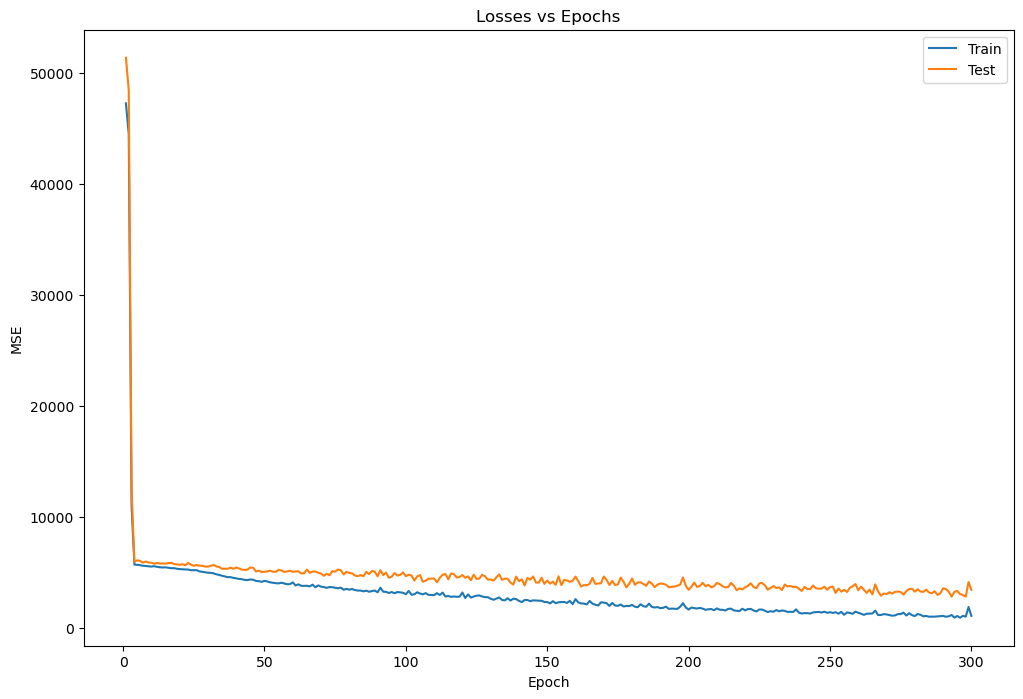

In [57]:
# Plot training progress
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(1,n_epochs+1),losses_train, label="Train")
ax.plot(np.arange(1,n_epochs+1),losses_test, label="Test")
ax.set(title="Losses vs Epochs", xlabel = "Epoch", ylabel = "MSE")
ax.legend()
plt.show()

In [58]:
# Predict MLP
y_pred_mlp = {}
y_pred_mlp['SGD Train'] = mlp_sgd.predict(X_train_std)[0]
y_pred_mlp['SGD Test'] = mlp_sgd.predict(X_test_std)[0]

### Results

In [59]:
results_12 = pd.DataFrame(columns=results_columns1)
results_12.loc['MLP - SGD'] = [mse_loss(y_train.to_numpy(), y_pred_mlp['SGD Train'])[0,0],
                               mse_loss(y_test.to_numpy(), y_pred_mlp['SGD Test'])[0,0],
                               r2_score(y_train.to_numpy(), y_pred_mlp['SGD Train']),
                               r2_score(y_test.to_numpy(), y_pred_mlp['SGD Test'])]

In [60]:
results_12

MSE                  $R^2$          
                 Train         Test     Train      Test
MLP - SGD  1047.303025  3401.614096  0.841971  0.484768

We see a large difference between test and train **MSE** and $R^2$. The **MSE** of the test `3402` is over triple the value of the **MSE** of the train `1047`. The $R^2$ score on training is `0.84`, but on testing it is `0.48`. This suggests the generalisation power is poor as the MLP is not able to capture much of the variance of the test data.

<a name="task-122"></a>

### (1.2.2) [(index)](#index-task-122)

We adapt the previous SGD functions to implement momentum by adding a `v` variable and a momentum term.

We define `v` as a list of dictionaries, each dictionary representing the `v` for a layer of the weights and biases, and update these in the new step function.

In [61]:
def sgd_momentum_step(X, y, v, mlp, learning_rate = 1e-3, momentum=0.4):
    # adjusted sgd step with momentum
    
    # Compute the forward pass.
    y_hat, forward_pass = mlp.predict(X)

    # Compute the partial derivative of the loss w.r.t. to predictions `y_hat`.
    delta_output = grad_mse_loss(y, y_hat)

    # Apply backpropagation algorithm to compute the gradients of the MLP parameters.
    gradients = backpropagate(mlp.layers, forward_pass, delta_output)
    
    updated_layers = []
    updated_v = []
    for layer, grad, v_layer in zip(mlp.layers, gradients, v):
        #  updated momentum step
        v_layer["W"] = momentum * v_layer["W"] + learning_rate * grad["W"]
        v_layer["b"] = momentum * v_layer["b"] + learning_rate * grad["b"]
        W = layer["W"] - v_layer["W"]
        b = layer["b"] - v_layer["b"]
        updated_layers.append({"W": W, "b": b,
                               # keep the activation function.
                               "activation": layer["activation"],
                               # We use the index for asserts and debugging purposes only.
                               "index": layer["index"]})
        updated_v.append(v_layer)
    return updated_layers, updated_v

In [62]:
def sgd_momentum(X_train, y_train, X_test, y_test, mlp, learning_rate = 1e-3,
        n_epochs=10, minibatchsize=1, seed=42, momentum=0.4):
    # adjusted sgd with momentum

    # get random number generator
    rng = np.random.default_rng(seed)

    # compute number of iterations per epoch
    n_iterations = int(len(y_train) / minibatchsize)

    # store losses
    losses_train = []
    losses_test = []

    epochs_bar = tqdm(range(n_epochs))
    for i in epochs_bar:

        # shuffle data
        p = rng.permutation(len(y_train))
        X_train_shuffled = X_train[p]
        y_train_shuffled = y_train[p]
        
        # instantiate v for momentum, utilising a list of dictionaries to store the v for each layer and weight/bias
        v = [{"W": np.zeros_like(layer["W"]), "b": np.zeros_like(layer["b"])} for layer in mlp.layers]

        for j in range(n_iterations):
            # get batch
            X_batch = X_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]
            y_batch = y_train_shuffled[j*minibatchsize : (j+1)*minibatchsize]

            # apply sgd with momentum step
            updated_layers, v = sgd_momentum_step(X_batch, y_batch, v, mlp, learning_rate, momentum)

            # update weights and biases of MLP
            mlp.layers = updated_layers 

        # compute loss at the end of each epoch
        y_hat_train, _ = mlp.predict(X_train)
        losses_train.append(mse_loss(y_train, y_hat_train).squeeze())
        y_hat_test, _ = mlp.predict(X_test)
        losses_test.append(mse_loss(y_test, y_hat_test).squeeze())
        epochs_bar.set_description(f'train_loss: {losses_train[-1]:.2f}, '
                                   f'test_loss: {losses_test[-1]:.2f}, '
                                   f'train_R^2: {r2_score(y_train, y_hat_train):.2f} '
                                   f'test_R^2: {r2_score(y_test, y_hat_test):.2f} ')
    return mlp, losses_train, losses_test

In [63]:
# Train MLP using SGD as optimisation method
n_epochs = 300
mlp_mom, losses_train, losses_test = sgd_momentum(X_train_std, y_train.to_numpy(), X_test_std, y_test.to_numpy(),
                                     mlp0, learning_rate = 5e-5,
                                     n_epochs=n_epochs,
                                     minibatchsize=8,
                                     seed=random_seed)

  0%|          | 0/300 [00:00<?, ?it/s]

In [64]:
# Predict MLP
y_pred_mlp['SGD Momentum Train'] = mlp_mom.predict(X_train_std)[0]
y_pred_mlp['SGD Momentum Test'] = mlp_mom.predict(X_test_std)[0]

### Results

In [65]:
results_12.loc['MLP - SGD momentum'] = [mse_loss(y_train.to_numpy(), y_pred_mlp['SGD Momentum Train'])[0,0], 
                                         mse_loss(y_test.to_numpy(), y_pred_mlp['SGD Momentum Test'])[0,0],
                                         r2_score(y_train.to_numpy(), y_pred_mlp['SGD Momentum Train']),
                                         r2_score(y_test.to_numpy(), y_pred_mlp['SGD Momentum Test'])]
results_12

MSE                  $R^2$          
                          Train         Test     Train      Test
MLP - SGD           1047.303025  3401.614096  0.841971  0.484768
MLP - SGD momentum   106.242831  2716.331370  0.983969  0.588565

Momentum helps the optimisation algorithm converge faster and potentially avoid local minima by helping the process continue in the same direction if the gradient has been consistent across several iterations. This reduces overfitting and allows for better generalisation of the model, whilst also efficiently processing the optimisation algorithm. We observe this in the performance metrics for both training and test data.

With momentum, on the training data, the MLP has a very high $R^2$ of `0.98` and very low **MSE** of `106` on the training data. On the test data, the $R^2$ and **MSE** also improve significantly from around `0.48` to `0.59` and `3402` to `2716` respectively.

In [66]:
results_12.loc['Random Forest'] = results_11.loc['Random Forest']

In [67]:
results_12

MSE                  $R^2$          
                          Train         Test     Train      Test
MLP - SGD           1047.303025  3401.614096  0.841971  0.484768
MLP - SGD momentum   106.242831  2716.331370  0.983969  0.588565
Random Forest       1225.814138  3046.742141  0.815035  0.538519

Comparing our MLP models to our random forest, our initial MLP performs better on the training data but worse on the test data in both **MSE** and $R^2$, which demonstrates it overfits more and is worse at generalising than our random forest. Our MLP with momentum performs significantly better on both training and test data in both **MSE** and $R^2$, and we conclude it is our best model among the 3.

<a name="task-123"></a>

### (1.2.3) [(index)](#index-task-123)

We implement Ridge regression on our data with a quadratic basis. We define the function quad_extend to add these quadratic terms to X_train and X_test. 

In [68]:
def quad_extend(X):
    """
    Extend X columns to include the quadratic terms of each column
    """
    p = X.shape[1]
    quad_features = np.column_stack([X[:,i] * X[:,j] for i in range(p) for j in np.arange(i,p)])
    return np.hstack((X, quad_features))

In [69]:
# Extend X_train and X_test to include quadratic terms of features
X_train_quad = quad_extend(X_train.to_numpy())
X_test_quad = quad_extend(X_test.to_numpy())

# Standardise so coefficients can be compared
X_test_quad_std = standardise(X_test_quad, X_train_= X_train_quad)
X_train_quad_std = standardise(X_train_quad)

Ridge estimate and linear regression predict functions imported from coding task

In [70]:
# Estimate ridge coefficients
def ridge_estimate(X, y, penalty):

    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)

    N, D = X.shape
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    N_aug, D_aug = X_aug.shape
    I = np.identity(D_aug)
    I[0] = 0.0 # penalty excludes the bias term.
    beta_ridge = np.linalg.solve(X_aug.T @ X_aug + penalty * I, X_aug.T @ y)
    return beta_ridge

In [71]:
def predict_LR(X_test, beta, beta0=None):

    # X_test: N x P matrix of test inputs
    # beta: P x 1 vector of parameters
    # beta0: bias term (y_intercept)
    # returns: prediction of f(X_test); K x 1 vector

    prediction = X_test @ beta + beta0

    return prediction

Ridge with specified $\lambda$ values

In [72]:
# Inferred coefficients from Ridge
beta_hat = []
lambda_vals = [0.0001, 1, 1000]

for lam in lambda_vals:
    beta_hat.append(ridge_estimate(X_train_quad_std, y_train, lam))

### Results

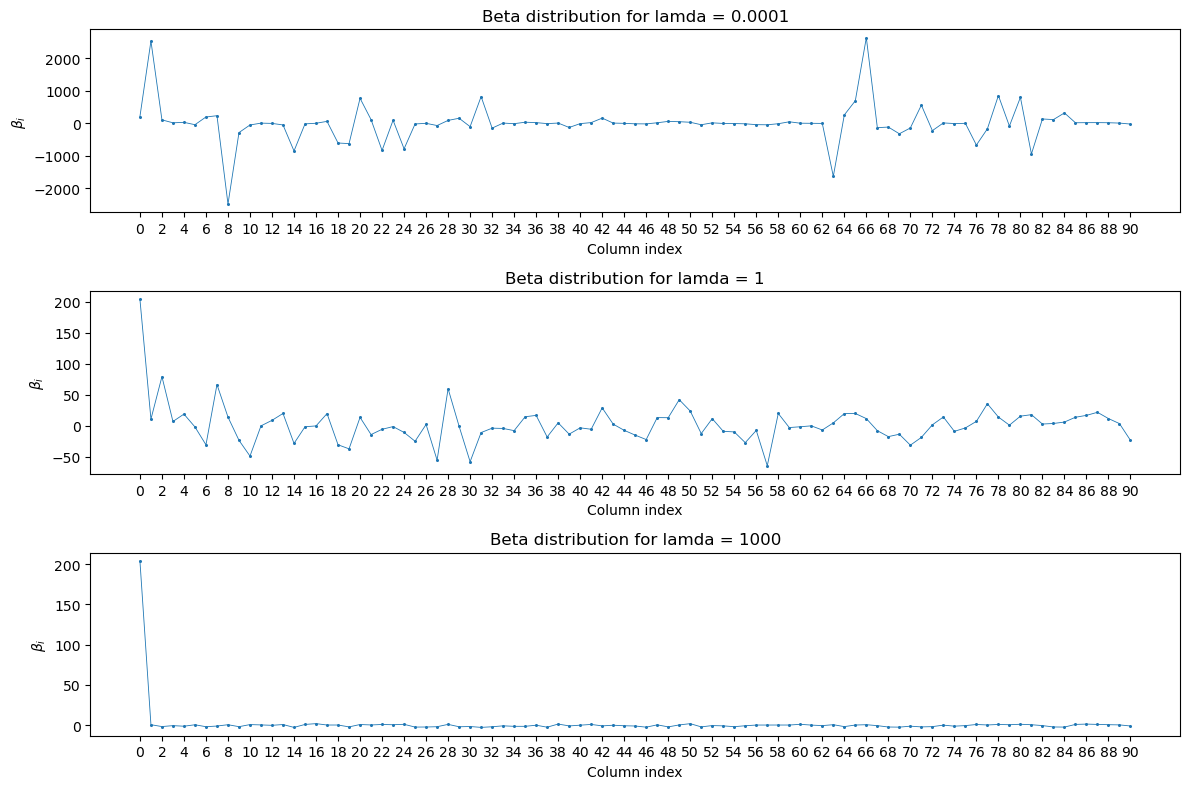

In [73]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))

for i in range(len(lambda_vals)):
    ax[i].plot(beta_hat[i], label=lambda_vals[i], ls='-', marker='o', linewidth=0.6, markersize=1.2)
    ax[i].set_xticks(np.arange(0, len(beta_hat[i]), 2))
    ax[i].set_title(f'Beta distribution for lamda = {lambda_vals[i]}')
    ax[i].set_xlabel('Column index')
    ax[i].set_ylabel(r'$\beta_i$')
    
plt.tight_layout()

$\lambda=0.0001$:
The $\beta$ coefficients are not significantly penalised for having large values, this model is the closest to standard linear regression. We observe some large magnitudes of coefficients throughout the graph, even at $i\gt12$, indicating that quadratic combinations of certain features affect the $\mathbf{y}$ outcome. The largest magnitudes appear to be at $i=1, 8, 6$. However, this may due to overfitting of the model, and perhaps not all these features are as important as shown. 

$\lambda=1$:
We observe the y-intercept $\beta_0$ is significantly larger in this case and has the largest magnitude among all coefficients, as the other coefficients are penalised more for larger magnitudes. There are still significantly larger coefficients more consistently throughout, suggesting some quadratic combinations of features contain information for the model. We observe large magnitudes at $i=2,8$.

$\lambda=1000$
Due to the large penalisation of coefficient magnitudes, the only significant value is $\beta_0$ and the others have shrunk to very small values. The model is very underfitted.

We find the optimal penalty using cross-validaiton

In [74]:
def cross_val_evaluate_ridge(X_train, y_train, folds, lam):
    #  Cross-validation using MSE as score

    scores = []
    for i in range(len(folds)):
        val_indices = folds[i]
        train_indices = list(set(range(X_train.shape[0])) - set(val_indices))
            
        # define training set
        X_t = X_train[train_indices]
        y_t = y_train[train_indices]

        # define validation set
        X_val = X_train[val_indices]
        y_val = y_train[val_indices]
        
        # standardise
        X_val_std = standardise(X_val, X_train_= X_t)
        X_t_std = standardise(X_t)

        # estimate using ridge and calculate MSE as score
        beta_hat = ridge_estimate(X_t_std, y_t, lam)
        y_pred = predict_LR(X_val_std, beta_hat[1:], beta_hat[0])
        score = MSE(y_val, y_pred)
        scores.append(score)

    return np.mean(scores) # Return average score across folds

In [75]:
def choose_best_lam(X_train, y_train, num_folds, lam_vals, seed=0):
    # Choose best penalty term for ridge regression using cross-validation
    
    best_lam, i_best_lam, min_score = None, 0, np.inf
    
    np.random.seed(seed)
    folds = np.array_split(np.random.permutation(X_train.shape[0]), 5)
    
    scores = []
    for i,lam in enumerate(lam_vals):
        score = cross_val_evaluate_ridge(X_train, y_train, folds, lam) # Cross-validation
        scores.append(score)
        # Update best lambda if score is lower
        if score < min_score:
            best_lam = lam
            i_best_lam = i
            min_score = score
            
        print(f'CV_MSE@lamba={lam}: {score:.3f}')
        
    return best_lam, i_best_lam, scores

In [76]:
# Find optimal penalty for Ridge with extended X_train using 5-fold cross-validation
lambda_vals = np.logspace(-3, 3, 100)
best_lam, i_best_lam, lam_scores = choose_best_lam(X_train_quad, y_train.to_numpy(), 5, lambda_vals, seed=random_seed)

CV_MSE@lamba=0.001: 6035.402
CV_MSE@lamba=0.0011497569953977356: 6034.986
CV_MSE@lamba=0.0013219411484660286: 6034.106
CV_MSE@lamba=0.0015199110829529332: 6032.650
CV_MSE@lamba=0.001747528400007683: 6030.507
CV_MSE@lamba=0.002009233002565048: 6027.565
CV_MSE@lamba=0.0023101297000831605: 6023.722
CV_MSE@lamba=0.0026560877829466868: 6018.893
CV_MSE@lamba=0.0030538555088334154: 6013.014
CV_MSE@lamba=0.003511191734215131: 6006.050
CV_MSE@lamba=0.004037017258596553: 5998.002
CV_MSE@lamba=0.004641588833612782: 5988.903
CV_MSE@lamba=0.005336699231206312: 5978.826
CV_MSE@lamba=0.006135907273413176: 5967.879
CV_MSE@lamba=0.007054802310718645: 5956.202
CV_MSE@lamba=0.008111308307896872: 5943.961
CV_MSE@lamba=0.0093260334688322: 5931.343
CV_MSE@lamba=0.010722672220103232: 5918.550
CV_MSE@lamba=0.012328467394420659: 5905.785
CV_MSE@lamba=0.014174741629268055: 5893.254
CV_MSE@lamba=0.016297508346206444: 5881.149
CV_MSE@lamba=0.01873817422860384: 5869.647
CV_MSE@lamba=0.021544346900318846: 5858.902


In [77]:
# Optimal lambda for Ridge with quad
best_lam

53.366992312063125

In [78]:
# Predict with extended quadratic terms using Ridge
y_pred_lr = {}
beta_hat = ridge_estimate(X_train_quad, y_train.to_numpy(), best_lam)
y_pred_lr['Ridge Quad'] = predict_LR(X_test_quad, beta_hat[1:], beta_hat[0])

In [79]:
results_123 = pd.DataFrame(columns=['MSE', r'$R^2$'])
results_123.loc['Ridge w/ Quad terms'] = [MSE(y_test.to_numpy(), y_pred_lr['Ridge Quad']), r2_score(y_test.to_numpy(), y_pred_lr['Ridge Quad'])]

We implement linear regression with and without Ridge to compare with.

In [80]:
# Estimate least squares coefficients
def LS_estimate(X, y):

    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)

    N, D = X.shape
    X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
    beta_ml = np.linalg.solve(X_aug.T @ X_aug, X_aug.T @ y)
    return beta_ml

In [81]:
# Estimate and predict using least squares only
beta_hat_ls = LS_estimate(X_train_std, y_train.to_numpy())
y_pred_lr['LS'] = predict_LR(X_test_std, beta_hat_ls[1:], beta_hat_ls[0])
results_123.loc['LS'] = [MSE(y_test.to_numpy(), y_pred_lr['LS']), r2_score(y_test.to_numpy(), y_pred_lr['LS'])]

In [82]:
# Find optimal penalty term for Ridge using 5-fold cross-validation
lambda_vals = np.logspace(-3,3,100)
best_lam, i_best_lam, scores = choose_best_lam(X_train.to_numpy(), y_train.to_numpy(), 5, lambda_vals, seed=random_seed)

CV_MSE@lamba=0.001: 5797.090
CV_MSE@lamba=0.0011497569953977356: 5797.077
CV_MSE@lamba=0.0013219411484660286: 5797.062
CV_MSE@lamba=0.0015199110829529332: 5797.045
CV_MSE@lamba=0.001747528400007683: 5797.025
CV_MSE@lamba=0.002009233002565048: 5797.002
CV_MSE@lamba=0.0023101297000831605: 5796.976
CV_MSE@lamba=0.0026560877829466868: 5796.946
CV_MSE@lamba=0.0030538555088334154: 5796.912
CV_MSE@lamba=0.003511191734215131: 5796.872
CV_MSE@lamba=0.004037017258596553: 5796.827
CV_MSE@lamba=0.004641588833612782: 5796.776
CV_MSE@lamba=0.005336699231206312: 5796.716
CV_MSE@lamba=0.006135907273413176: 5796.649
CV_MSE@lamba=0.007054802310718645: 5796.571
CV_MSE@lamba=0.008111308307896872: 5796.483
CV_MSE@lamba=0.0093260334688322: 5796.382
CV_MSE@lamba=0.010722672220103232: 5796.266
CV_MSE@lamba=0.012328467394420659: 5796.135
CV_MSE@lamba=0.014174741629268055: 5795.986
CV_MSE@lamba=0.016297508346206444: 5795.816
CV_MSE@lamba=0.01873817422860384: 5795.623
CV_MSE@lamba=0.021544346900318846: 5795.405


In [83]:
# Optimal lambda for ridge without quad
best_lam

81.11308307896873

In [84]:
# Estimate and predict using linear regression with Ridge
beta_hat_ridge = ridge_estimate(X_train.to_numpy(), y_train.to_numpy(), best_lam)
y_pred_lr['Ridge'] = predict_LR(X_test.to_numpy(), beta_hat_ridge[1:], beta_hat_ridge[0])
results_123.loc['Ridge'] = [MSE(y_test.to_numpy(), y_pred_lr['Ridge']), r2_score(y_test.to_numpy(), y_pred_lr['Ridge'])]

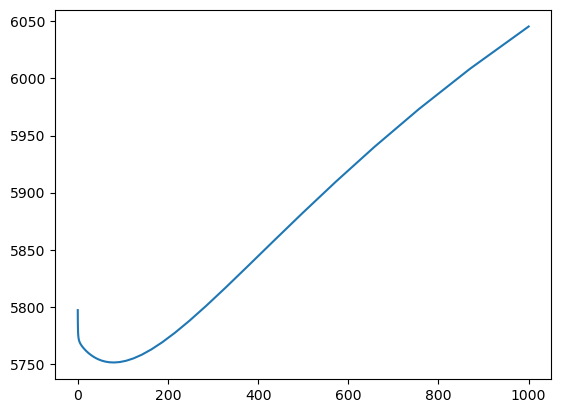

In [85]:
# Visualise our lambda scores
plt.plot(lambda_vals, scores)

### Results

In [86]:
results_123

MSE     $R^2$
Ridge w/ Quad terms  5073.166243  0.231582
LS                   5794.722719  0.122290
Ridge                5745.682198  0.129718

We observe the ridge regression with quadratic terms outperforms the standard linear regression with and without ridge models, with both a lower **MSE** and higher $R^2$ score.



---



<a name="task-2"></a>

# (2) Task 2: Classification [(index)](#index-task-2)

Initial data exploration

In [87]:
medical_train = pd.read_csv('brain_cancer_samples.csv')
medical_test = pd.read_csv('brain_cancer_test.csv')

In [88]:
medical_train.describe()

Patient ID     2D Surface  Contour Size  Total Surface     Density  \
count  145.000000     145.000000    145.000000     145.000000  145.000000   
mean    73.000000   11197.331034    561.902852   24948.872414    0.616912   
std     42.001984   37505.105580    700.870894   61834.821186    0.306082   
min      1.000000      10.000000     13.071068      12.000000    0.055568   
25%     37.000000     395.000000    120.124890     693.000000    0.414042   
50%     73.000000    1437.500000    275.622365    2979.500000    0.674065   
75%    109.000000    5446.500000    743.737149   13503.500000    0.888472   
max    145.000000  386972.500000   3924.688712  491608.500000    0.997361   

         Diameter  Primary Axis  Shape Variation    Location  \
count  145.000000    145.000000       145.000000  145.000000   
mean    74.180916    130.089811       203.119272    1.524138   
std     93.887532    181.937427       395.821280    1.333764   
min      3.568248      2.107625         4.760943    0.000000   
25%     22.426092     20.596636        45.993591    0.000000   
50%     42.781793     56.513119        91.704414    1.000000   
75%     83.274841    209.590240       283.598083    3.000000   
max    701.932112   1388.291992      4315.014648    4.000000   

       Eccentricity_Real  Eccentricity_Imag       Class  
count       1.450000e+02         145.000000  145.000000  
mean        1.112586e-16           1.817069    0.800000  
std         1.671465e-16           2.733265    0.641179  
min         1.270000e-17           0.206967    0.000000  
25%         4.980000e-17           0.812745    0.000000  
50%         6.940000e-17           1.133157    1.000000  
75%         1.090000e-16           1.772417    1.000000  
max         1.720000e-15          28.144217    2.000000

In [89]:
medical_train.shape

(145, 12)

In [90]:
medical_test.describe()

Patient ID    2D Surface  Contour Size  Total Surface    Density  \
count   60.000000  6.000000e+01     60.000000   6.000000e+01  60.000000   
mean    30.500000  2.455458e+04    521.442528   3.350627e+04   0.651041   
std     17.464249  1.501222e+05    780.668332   1.520488e+05   0.294364   
min      1.000000  1.050000e+01     15.656854   1.200000e+01   0.052286   
25%     15.750000  2.368750e+02     83.982756   2.533750e+02   0.515505   
50%     30.500000  1.077750e+03    249.643179   2.633500e+03   0.705455   
75%     45.250000  3.634875e+03    474.537621   7.425250e+03   0.917770   
max     60.000000  1.164150e+06   4453.521314   1.172680e+06   0.994505   

          Diameter  Primary Axis  Shape Variation   Location  \
count    60.000000     60.000000        60.000000  60.000000   
mean     74.749002    137.006346       367.426233   1.566667   
std     161.590988    281.655769      1701.471708   1.319562   
min       3.656366      2.158408         5.575232   0.000000   
25%      17.260125     14.750198        34.548401   1.000000   
50%      36.941234     46.521692        72.449947   1.000000   
75%      68.002780    138.755505       173.949669   2.250000   
max    1217.473538   1797.920654     13210.791020   4.000000   

       Eccentricity_Real  Eccentricity_Imag      Class  
count       6.000000e+01          60.000000  60.000000  
mean        1.077267e-16           1.759128   0.816667  
std         1.053287e-16           1.719877   0.624138  
min         1.270000e-17           0.206967   0.000000  
25%         4.502500e-17           0.734834   0.000000  
50%         6.650000e-17           1.086010   1.000000  
75%         1.150000e-16           1.878357   1.000000  
max         4.530000e-16           7.399764   2.000000

In [91]:
medical_test.shape

(60, 12)

In [92]:
medical_train.columns

Index(['Patient ID', '2D Surface', 'Contour Size', 'Total Surface', 'Density',
       'Diameter', 'Primary Axis', 'Shape Variation', 'Location',
       'Eccentricity_Real', 'Eccentricity_Imag', 'Class'],
      dtype='object')

Setting target column

In [93]:
target_column = 'Class'

We drop `Patient ID` as it is non-informative and can result in overfitted models. It also indexes the test data and is not unique, and so introduces unnecessary noise to our data.

In [94]:
y_train, X_train = medical_train[target_column], medical_train.drop(columns=['Patient ID', target_column],inplace=False)

y_test, X_test = medical_test[target_column], medical_test.drop(columns=['Patient ID', target_column],inplace=False)

In [95]:
# Set Location column to be categorical, others are numerical
columns_categorical = np.array([False for i in range(X_train.shape[1])])
columns_categorical[7] = True
columns_categorical

array([False, False, False, False, False, False, False,  True, False,
       False])

<a name="task-21"></a>

## (2.1) k-Nearest Neighbours [(index)](#index-task-21)

<a name="task-211"></a>

### (2.1.1) [(index)](#index-task-211)

We implement kNN for classification using adjusted functions from coding tasks.

We introduce Hamming distance for our categorical column, and compute distance as a sum of both Euclidean and Hamming.

In [96]:
def euclidean_distance(p, q):
    # Distance for numerical data
    return np.sqrt(np.sum((q-p)**2))

In [97]:
def hamming_distance(p, q):
    # Distance for categorical data
    return sum(q != p)

In [98]:
def distance(p, q, columns_categorical):
    # Combined distance
    return euclidean_distance(p[~columns_categorical], q[~columns_categorical]) + \
            hamming_distance(p[columns_categorical], q[columns_categorical])

In [99]:
def k_neighbours(X_train, X_test, columns_categorical, k=5, return_distance=False):
    n_neighbours = k
    dist = []
    neigh_ind = []

    # compute distance from each point x_text in X_test to all points in X_train
    point_dist = [[distance(x_test, x_train, columns_categorical) for x_train in X_train] for x_test in X_test]
    
    # determine which k training points are closest to each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    # return distances together with indices of k nearest neighbouts
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
    
    return np.array(neigh_ind)

In [100]:
def predict_knn(X_train, y_train, X_test, columns_categorical, k=5, pandas_input = True):
    
    if pandas_input:
        X_train, y_train, X_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy()
    
    # standardise numerical data
    X_test[:, ~columns_categorical] = standardise(X_test[:, ~columns_categorical], X_train_ = X_train[:, ~columns_categorical])
    X_train[:, ~columns_categorical] = standardise(X_train[:, ~columns_categorical])
                        
    # each of the k neighbours contribu to the classification of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, columns_categorical, k=k)
    # count number of occurences of label with np.bincount and choose the label that has most with np.argmax
    y_pred = np.array([np.argmax(np.bincount(y_train[neighbour])) for neighbour in neighbours])

    return y_pred

The functions to calculate our metrics.

Macro-average and weighted average metrics are calculated using the confusion matrix. 

In [101]:
def confusion_matrix(y_pred, y_test, num_classes):
    cm = np.zeros((num_classes, num_classes))
    for k in range(len(y_pred)):
        cm[y_test[k],y_pred[k]] += 1
    return cm

In [102]:
def micro_average_accuracy(y_pred, y_test):
    return np.mean(y_pred==y_test)

def micro_average_precision(y_pred, y_test):
    TP = sum((y_pred == y_test))
    FP = sum((y_pred != y_test))
    return TP/(TP+FP)

def macro_average_accuracy(y_pred, y_test, num_classes):
    cm = confusion_matrix(y_pred, y_test, num_classes)
    # Calculate accuracy for each class
    accuracies = (np.full(num_classes, np.sum(cm)) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + 2*np.diag(cm))/np.sum(cm)
    return np.mean(accuracies) # Mean across classes

def macro_average_precision(y_pred, y_test, num_classes):
    cm = confusion_matrix(y_pred, y_test, num_classes)
    # Calculate precision for each class
    precisions = np.diag(cm)/np.sum(cm, axis=0)
    return np.mean(precisions) # Mean across classes

def w_average_accuracy(y_pred, y_test, num_classes):
    class_counts = np.bincount(y_test, minlength=num_classes) # Class counts from true test data
    cm = confusion_matrix(y_pred, y_test, num_classes)
    # Calculate accuracy for each class
    accuracies = (np.full(num_classes, np.sum(cm)) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + 2*np.diag(cm))/np.sum(cm)
    return class_counts @ accuracies / len(y_test) # Weighted average using class counts

def w_average_precision(y_pred, y_test, num_classes):
    class_counts = np.bincount(y_test, minlength=num_classes) # Class counts from true test data
    cm = confusion_matrix(y_pred, y_test, num_classes)
    # Calculate precision for each class
    precisions = np.diag(cm)/np.sum(cm, axis=0)
    return class_counts @ precisions / len(y_test) # Weighted average using class counts

Cross validation functions for kNN

In [103]:
def cross_val_evaluate_knn(X_train, y_train, columns_categorical, folds, k):
    #  Using micro-averaged accuracy as score

    scores = []
    
    for i in range(len(folds)):
        val_indices = folds[i]
        train_indices = list(set(range(X_train.shape[0])) - set(val_indices))

        X_t = X_train[train_indices]
        y_t = y_train[train_indices]

        # define the validation set
        X_val = X_train[val_indices]
        y_val = y_train[val_indices]

        y_pred = predict_knn(X_t, y_t, X_val, columns_categorical, k=k, pandas_input=False)
        score = micro_average_accuracy(y_pred, y_val)
        scores.append(score)

    return np.mean(scores)

In [104]:
def choose_best_k(X_train, y_train, columns_categorical, num_folds, k_range, seed=0):
    # Choose best k for kNN using cross-validation
    k_scores = np.zeros((len(k_range),))
    
    np.random.seed(seed)
    folds = np.array_split(np.random.permutation(X_train.shape[0]), 5)
    
    for i, k in enumerate(k_range):
        k_scores[i] = cross_val_evaluate_knn(X_train, y_train, columns_categorical, folds, k)
        print(f'CV_ACC@k={k}: {k_scores[i]:.3f}')

    best_k_index = np.argmax(k_scores)
    return k_range[best_k_index], k_scores

5-fold cross validation for kNN to choose optimal k

In [105]:
# 5-fold cv for kNN
k_range = np.arange(1, 31)
best_k, k_scores = choose_best_k(X_train.to_numpy(), y_train.to_numpy(), columns_categorical, 5, k_range, seed=random_seed)

CV_ACC@k=1: 0.717
CV_ACC@k=2: 0.738
CV_ACC@k=3: 0.779
CV_ACC@k=4: 0.772
CV_ACC@k=5: 0.766
CV_ACC@k=6: 0.779
CV_ACC@k=7: 0.772
CV_ACC@k=8: 0.745
CV_ACC@k=9: 0.759
CV_ACC@k=10: 0.745
CV_ACC@k=11: 0.766
CV_ACC@k=12: 0.752
CV_ACC@k=13: 0.752
CV_ACC@k=14: 0.745
CV_ACC@k=15: 0.752
CV_ACC@k=16: 0.752
CV_ACC@k=17: 0.745
CV_ACC@k=18: 0.752
CV_ACC@k=19: 0.745
CV_ACC@k=20: 0.779
CV_ACC@k=21: 0.745
CV_ACC@k=22: 0.738
CV_ACC@k=23: 0.738
CV_ACC@k=24: 0.710
CV_ACC@k=25: 0.710
CV_ACC@k=26: 0.710
CV_ACC@k=27: 0.710
CV_ACC@k=28: 0.703
CV_ACC@k=29: 0.690
CV_ACC@k=30: 0.669


Text(0, 0.5, 'Micro-average accuracy')

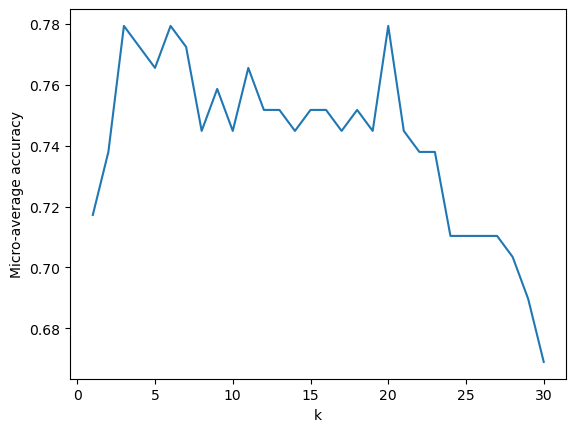

In [106]:
# Visualise our k value scores
plt.plot(k_range, k_scores)
plt.xlabel('k')
plt.ylabel('Micro-average accuracy')

In [107]:
# Our optimal k value
best_k

6

In [108]:
# Finding our minority class
print(medical_train[target_column].value_counts())
print(np.bincount(y_train))

Class
1    80
0    47
2    18
Name: count, dtype: int64
[47 80 18]


The minority class is class 2, the meningioma malignant type.

In [109]:
# Predict test data using kNN
y_pred_knn = predict_knn(X_train, y_train, X_test, columns_categorical, k=best_k)

### Results

In [110]:
# Confusion matrix
print(confusion_matrix(y_pred_knn, y_test,3))

[[12.  6.  0.]
 [ 7. 28.  0.]
 [ 0.  3.  4.]]


In [111]:
results_columns21 = pd.MultiIndex.from_product([('Micro-average', 'Macro-average', 
                                                 'Class-weighted average'), 
                                                ('Accuracy', 'Precision')])

results_21 = pd.DataFrame(columns=results_columns21)
results_21.loc['kNN'] = [micro_average_accuracy(y_pred_knn, y_test), micro_average_precision(y_pred_knn, y_test), 
                         macro_average_accuracy(y_pred_knn, y_test, 3), macro_average_precision(y_pred_knn, y_test, 3), 
                         w_average_accuracy(y_pred_knn, y_test, 3), w_average_precision(y_pred_knn, y_test, 3)]

In [112]:
results_21

Micro-average           Macro-average           Class-weighted average  \
         Accuracy Precision      Accuracy Precision               Accuracy   
kNN      0.733333  0.733333      0.822222  0.796112               0.773611   

               
    Precision  
kNN  0.747582

The accuracy and precision are quite high across all averages, suggesting the kNN classifier performs well across all classes on the test data set. The macro-averages are higher than the micro-averages, so the classifier performs better on individual classes, i.e. treating the classes as equal, in comparison to overall, where we treat each sample equally. These results suggest the model's performance varies across classes. 

When we calculate the class-weighted averages, which takes into account the distribution of the classes, the accuracy and precision are better than the micro-averages, but worse than the macro-averages. This suggests the model is quite good at predicting at the minority class, as putting less weight on it decreases the macro-average.

<a name="task-212"></a>

### (2.1.2) [(index)](#index-task-212)

For our reweighting strategy, we used the inverse proportion of the class frequencies of our training data as our weights, and adjust the vote counts with these weights before predicting the class with the majority vote. This puts more weight on minority classes, so a sample is more likely to be assigned a minority class within its k-neighbour range.

In [113]:
def predict_knn_weighted(X_train, y_train, X_test, columns_categorical, k=5, pandas_input=True):
    # Predict kNN with weights on data points
    
    if pandas_input:
        X_train, y_train, X_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy()
    
    # standardise data
    X_test[:, ~columns_categorical] = standardise(X_test[:, ~columns_categorical], X_train_ = X_train[:, ~columns_categorical])
    X_train[:, ~columns_categorical] = standardise(X_train[:, ~columns_categorical])
    
    # Weights are the inverse class frequencies of the training data
    weights = len(y_train)/np.bincount(y_train)
    
    distances, neighbours = k_neighbours(X_train, X_test, columns_categorical, k=k, return_distance=True)

    y_pred = np.array([np.argmax(np.bincount(y_train[neighbour], minlength=3) * weights) for neighbour in neighbours])

    return y_pred

In [114]:
# Predict test data using weighted kNN
y_pred_knn_weighted = predict_knn_weighted(X_train, y_train, X_test, columns_categorical, k=best_k)

In [115]:
# Confusion matrix
print(confusion_matrix(y_pred_knn_weighted, y_test, 3))

[[12.  4.  2.]
 [ 7. 25.  3.]
 [ 0.  2.  5.]]


In [116]:
results_21.loc['Weighted kNN'] = [micro_average_accuracy(y_pred_knn_weighted, y_test), 
                                  micro_average_precision(y_pred_knn_weighted, y_test), 
                                  macro_average_accuracy(y_pred_knn_weighted, y_test, 3), 
                                  macro_average_precision(y_pred_knn_weighted, y_test, 3), 
                                  None, None]
results_21


Micro-average           Macro-average            \
                  Accuracy Precision      Accuracy Precision   
kNN               0.733333  0.733333      0.822222  0.796112   
Weighted kNN      0.700000  0.700000      0.800000  0.646010   

             Class-weighted average            
                           Accuracy Precision  
kNN                        0.773611  0.747582  
Weighted kNN                    NaN       NaN

Overall, all metrics decrease with our weighted version of kNN, indicating it performs worse than the standard kNN model. This is likely due to the impact on prediction of class 0 and 1 due to the weights. Although from the confusion matrix we observe more correct predictions (True Positives) of the minority class 2 from 4 to 5, overall accuracy and precision decreases across all classes and all samples, with macro-average precision most negatively affected.

<a name="task-213"></a>

### (2.1.3) [(index)](#index-task-213)

We define our 2-step kNN predict function

In [117]:
def predict_knn_2step(X_train, y_train, X_test, columns_categorical, k1=5, k2=1, pandas_input=True):
    
    if pandas_input:
        X_train, y_train, X_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy()
        
    #  Step 1, classify benign vs malignant
    
    y_train_01 = np.where(y_train==2, 1, y_train) # convert 2 to 1
    
    y_pred = predict_knn(X_train, y_train_01, X_test, columns_categorical, k=k1, pandas_input=False) # binary classification
        
    #  Step 2, classify class 1 vs class 2
    
    malignant_indices_train = np.where(y_train != 0) # only get malignant training samples
    X_train_12 = X_train[malignant_indices_train]
    y_train_12 = y_train[malignant_indices_train]
    
    malignant_indices_pred = np.where(y_pred != 0) # only get malignant predicted samples
    X_test_12 = X_test[malignant_indices_pred]

    y_pred_12 = predict_knn(X_train_12, y_train_12, X_test_12, columns_categorical, k=k2, pandas_input=False)
    
    #  Add step2 to step1
    y_pred[malignant_indices_pred] = y_pred_12

    return y_pred

In [118]:
# Predict test data using 2-step kNN
y_pred_knn_2step = predict_knn_2step(X_train, y_train, X_test, columns_categorical, k1=best_k, k2=1)

In [119]:
# Confusion matrix
print(confusion_matrix(y_pred_knn_2step, y_test,3))

[[12.  6.  0.]
 [ 7. 28.  0.]
 [ 0.  2.  5.]]


In [120]:
results_21.loc['2step kNN'] = [micro_average_accuracy(y_pred_knn_2step, y_test), 
                               micro_average_precision(y_pred_knn_2step, y_test), 
                               macro_average_accuracy(y_pred_knn_2step, y_test, 3), 
                               macro_average_precision(y_pred_knn_2step, y_test, 3), None, None]
results_21


Micro-average           Macro-average            \
                  Accuracy Precision      Accuracy Precision   
kNN               0.733333  0.733333      0.822222  0.796112   
Weighted kNN      0.700000  0.700000      0.800000  0.646010   
2step kNN         0.750000  0.750000      0.833333  0.803119   

             Class-weighted average            
                           Accuracy Precision  
kNN                        0.773611  0.747582  
Weighted kNN                    NaN       NaN  
2step kNN                       NaN       NaN

From our results, we observe an improvement among all metrics for the 2-step kNN in comparison to our earlier models. This indicates it is more accurate and precise both when treating classes equally and when treating samples equally. By splitting the process, we have two k-values, hence more flexibility with our parameters for our model. It also alleviates class imbalance by combining the minority class with another class initially, and also simplifies the classification problem into two binary ones.



---



<a name="task-22"></a>

## (2.2) Logistic regression vs kernel logistic regression [(index)](#index-task-22)

<a name="task-221"></a>

### (2.2.1) [(index)](#index-task-221)

We import logistic functions from the coding task.

They are adapted to include $\beta_0$ and the ridge penalty.

In [121]:
def logistic(z):
    return 1. / (1. + np.exp(-z))

In [122]:
def predict_log(X, beta, beta0):
    z = X @ beta + beta0
    y_log = logistic(z)
    return y_log.squeeze()

In [123]:
def propagate(X, y, beta, beta0, lam):
    """
    Arguments:
        X: Data of shape (N, p)
        y: True label vector of size N
        beta: Parameter vector, a numpy array of size p
        beta0: Intercept parameter
        lam: Penalty term

    Returns:
        grads: Gradients dictionary
        mean_loss: Mean sample loss for the negative log-likelihood

    """
    y_log = predict_log(X, beta, beta0)

    # Mean sample loss function, including ridge component
    mean_loss = -np.mean(y*np.log(y_log) + (1-y)*np.log(1-y_log)) + (lam/2) * np.linalg.norm(beta)**2
    
    # Derivatives, including ridge component
    dbeta = np.mean(X.T * (y_log - y), axis=1).reshape(-1,1) + lam*beta 
    dbeta0 = np.mean(y_log - y)
    
    mean_loss = np.squeeze(mean_loss)
  
    # Store gradients in a dictionary
    grads = {'dbeta': dbeta, 'dbeta0' : dbeta0}
  
    return grads, mean_loss

In [124]:
def optimise(X, y, beta, beta0, lam=0.0025, num_iterations=1000, learning_rate=0.1, print_loss=False):
    """
    Arguments:
        X: Data of shape (N, p+1)
        y: True label vector of size N
        beta: Parameter vector, a numpy array of size p
        beta0: Intercept parameter
        lam: Penalty term
        num_iterations: Number of iterations
        learning_rate: Step size in updating procedure
        print_loss: 'True' to print the mean loss every 100 iterations

    Returns:
        params: Dictionary containing the parameters
        grads: Dictionary containing the gradient
        mean_loss_history: List of all the mean loss values computed during the optimisation
    """
    mean_loss_history = []
    
    for i in range(num_iterations):
        
        # Calculating the loss and gradients
        grads, mean_loss = propagate(X, y, beta, beta0, lam)
      
        # Retrieving derivatives from grads
        dbeta = grads['dbeta']
        dbeta0 = grads['dbeta0']
                
        # Updating procedure
        beta -= learning_rate * dbeta
        beta0 -= learning_rate * dbeta0    
              
        # Record the loss values
        if i % 100 == 0:
            mean_loss_history.append(mean_loss)
      
        # Printing the loss every 100 iterations
        if print_loss and i % 100 == 0:
            print ('Mean loss after iteration %i: %f' %(i, mean_loss))
  
    # Saving parameters and gradients in dictionary
    params = {'beta': beta, 'beta0' : beta0}
    grads = {'dbeta': dbeta, 'dbeta0': dbeta0}
  
    return params, grads, mean_loss_history

In [125]:
def predict(X_test, beta, beta0):
    """
    Arguments:
        X_test: Test set of shape (N_test, p)
        beta: Parameter vector, a numpy array of size p
        beta0: Intercept parameter

    Returns:
        y_pred: Vector containing all binary predictions (0/1) for X_test
    
    """
    N_test = X_test.shape[0]
    beta = beta.reshape(X_test.shape[1], 1)
  
    # Predicting the probabilities
    y_log = predict_log(X_test, beta, beta0)
  
    y_pred = y_log.round().reshape(1,-1)
  
    return y_pred

In [126]:
def model(X_train, y_train, X_test, y_test, lam=0.0025, num_iterations=2000, learning_rate=0.1, print_loss=False):
    # Logistic regression model
    
    # Initialising parameters with zeros
    beta, beta0 = np.zeros((X_train.shape[1],1)), 0.

    # Gradient descent
    parameters, grads, mean_loss_history = optimise(X_train, y_train, beta, beta0, lam, 
                                                    num_iterations, learning_rate, print_loss=print_loss)

    # Retrieving parameter vector beta from dictionary 'parameters'
    beta = parameters['beta']
    beta0 = parameters['beta0']

    # Predicting test and training set examples
    y_pred_test = predict(X_test, beta, beta0)
    y_pred_train = predict(X_train, beta, beta0)

    # Printing train/test accuracy
    print('Training accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('Test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # Saving all the information
    d = {'mean_loss_history': mean_loss_history, 'y_pred_test': y_pred_test, 
         'y_pred_train': y_pred_train, 'beta': beta, 'beta0': beta0, 
         'learning_rate': learning_rate, 'num_iterations': num_iterations}
  
    return d

In [127]:
# Convert into binary 0, 1 outcomes
y_train_01 = np.where(y_train==2, 1, y_train)
y_test_01 = np.where(y_test==2, 1, y_test)

# Standardise data
X_test_std = standardise(X_test.to_numpy(), X_train_ = X_train.to_numpy())
X_train_std = standardise(X_train.to_numpy())

d = model(X_train_std, y_train_01, X_test_std, y_test_01, lam=0.0025, num_iterations=10000, learning_rate=0.1, print_loss=False)

Training accuracy: 78.62068965517241 %
Test accuracy: 83.33333333333334 %


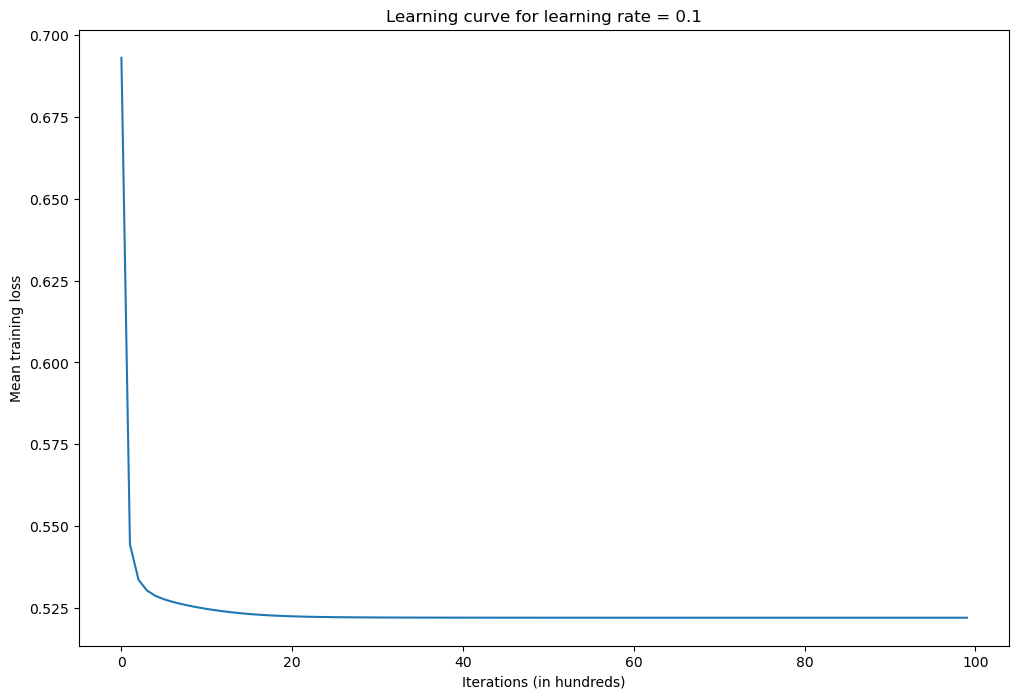

In [128]:
# Plot mean loss history
loss_history = np.squeeze(d['mean_loss_history'])
plt.figure(figsize=(12,8))
plt.ylabel('Mean training loss')
plt.xlabel('Iterations (in hundreds)')
plt.title('Learning curve for learning rate = ' + str(d['learning_rate']))
plt.plot(loss_history)

We adapt the ROC curve function from the coding task to a PR curve function.

In [129]:
def pr_curve(y_true, y_log):
    """
    Arguments:
    y_true: Ground truth labels with size N
    y_log: Probabilities produced by logistic regression model with size N
  
    Returns:
    auc: Area Under the Curve (AUC)
    tpr_l: List of true positive rate (TPR) values for each scanned threshold
    fpr_l: List of false positive rate (FPR) values for each scanned threshold
    thresholds: Scanned thresholds sorted in decreasing order
    
    """
    # List of distinct values in y_log, sorted sorted in decreasing order
    thresholds = reversed(sorted(set(y_log)))
    precisions, recalls = [], []

    for threshold in thresholds:
        # Thresholding
        y_thresholded = (y_log >= threshold)

        # True positives
        tp = np.sum(y_true & y_thresholded)
        # False positives
        fp = np.sum((~y_true) & y_thresholded)
        # False negatives
        fn = np.sum(y_true & (~y_thresholded))

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        precisions.append(precision)
        recalls.append(recall)

    # Compute AUC using Trapezoidal rule
    auc = np.trapz(precisions, recalls)
    return auc, precisions, recalls, thresholds

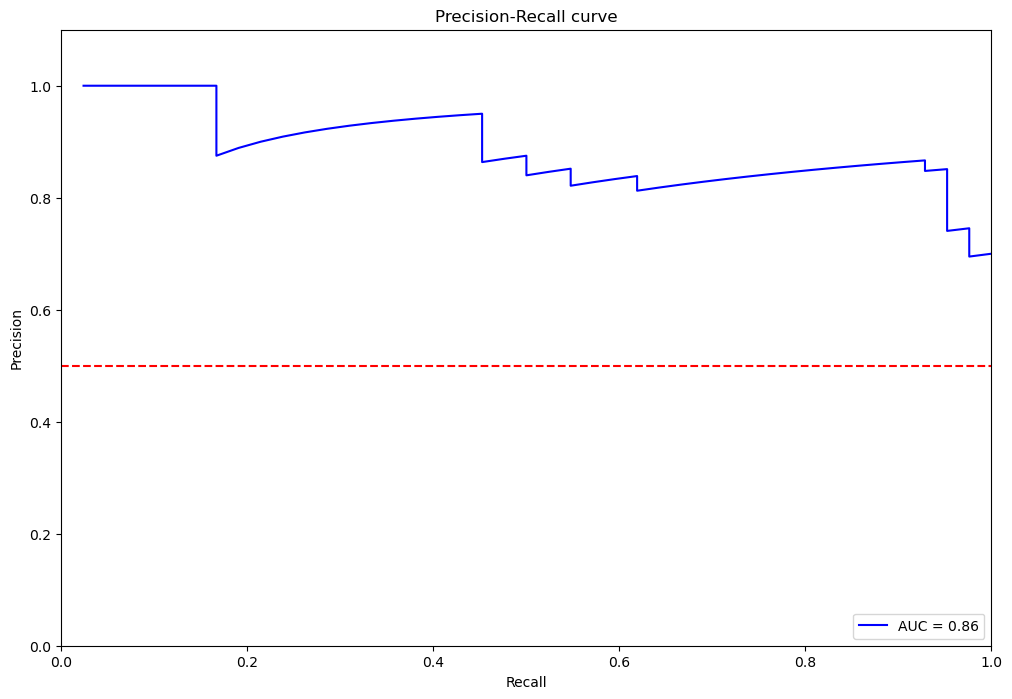

In [130]:
# Plot PR curve
y_log = predict_log(X_test_std, d['beta'], d['beta0'])
auc, precision, recall, th = pr_curve(y_test_01, y_log)

plt.figure(figsize=(12,8))
plt.title(f'Precision-Recall curve')
plt.plot(recall, precision, 'b', label=f'AUC = {auc:0.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0.5, 0.5], 'r--', label='Random classifier')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


We observe the precision-recall curve lies above the random classifier line as expected. As we progressively increase the threshold for classification, the recall increases and the precision decreases in steps that increase momentarily. The AUC of `0.86` indicates a good trade-off between precision and recall, suggesting the model is performing well. It is clearly better than a random classifier, where AUC would be around `0.5`.

<a name="task-222"></a>

### (2.2.2) [(index)](#index-task-222)

Our new loss function is:
$$
E(L) = -\frac{1}{N}\sum^N_{i=1} y^{(i)} \log h_{\mathbf{u},u_0}(\mathbf{k}^{(i)}) + (1-y^{(i)}) \log(1 - h_{\mathbf{u},u_0}(\mathbf{k}^{(i)} ) + \frac{\lambda}{2} \mathbf{u}^\top\mathbf{K}\mathbf{u}
$$
where the Gram matrix $\mathbf{K}$ is defined as:
$$
\mathbf{K}_{ij} \equiv k(\mathbf{x}^{(i)}, \mathbf{x}^{(j)})
$$

The regularisation component is a quadratic term, with a positive semi-definite matrix $\mathbf{K}$ by definition, hence this term is convex.

The initial sum component is the standard logistic loss function as seen in the coding task. This utilises the mean sample **negative log-likelihood loss function** as seen in lecture notes. From the lecture notes, it is stated the log-likelihood is concave, hence the negative log-likelihood is convex, and so the standard logistic loss function is convex.

The sum of two convex function is convex, so our new kernel loss function is convex, and optimising this function is a convex problem.

We define our kernel matrix function and adapt our propagate function to take the new kernelised variables and return the new loss function and grads.

In [131]:
def kernel_matrix(X1,X2,alpha):
    # Return kernel matrix using Laplacian kernel
    
    n1,m1 = X1.shape
    n2,m2 = X2.shape
    kernel = np.zeros((n1,n2))

    for i in range(n1):
        exponent = np.linalg.norm(X2 - X1[i],ord=1,axis=1) 
        kernel[i,:] = np.exp(-alpha*exponent)

    return kernel

In [132]:
def propagate_kernel(K, y, u, u0, lam):
    # Adapted propogate function with kernel matrix and u
    
    y_log_k = predict_log(K, u, u0)

    # Mean loss with Kernel
    mean_loss = -np.mean(y*np.log(y_log_k) + (1-y)*np.log(1-y_log_k)) + (lam/2) * u.T @ K @ u
    
    # Derivatives with Kernel
    du = np.mean(K.T * (y_log_k - y), axis=1).reshape(-1,1) + lam * K @ u
    du0 = np.mean(y_log_k - y)
    
    mean_loss = np.squeeze(mean_loss)
  
    # Store gradients in a dictionary
    grads = {'du': du, 'du0' : du0}
  
    return grads, mean_loss

<a name="task-223"></a>

### (2.2.3) [(index)](#index-task-223)

We adapt the optimise and model functions from earlier to take the new kernelised variables and utilise the new propagate function.

In [133]:
def optimise_kernel(K, y, u, u0, lam=0.0025, num_iterations=1000, learning_rate=0.1, print_loss=False):
    # Adapted optimise function with kernel and u
    
    mean_loss_history = []
    
    for i in range(num_iterations):
        
        # Calculating the loss and gradients
        grads, mean_loss = propagate_kernel(K, y, u, u0, lam)
      
        # Retrieving derivatives from grads
        du = grads['du']
        du0 = grads['du0']
                        
        # Updating procedure
        u -= learning_rate * du
        u0 -= learning_rate * du0   
              
        # Record the loss values
        if i % 100 == 0:
            mean_loss_history.append(mean_loss)
      
        # Printing the loss every 100 iterations
        if print_loss and i % 100 == 0:
            print ('Mean loss after iteration %i: %f' %(i, mean_loss))
  
    # Saving parameters and gradients in dictionary
    params = {'u': u, 'u0' : u0}
    grads = {'du': du, 'du0': du0}
  
    return params, grads, mean_loss_history

In [134]:
def model_kernel(X_train, y_train, X_test, y_test, alpha=0.3, lam=0.0025, num_iterations=2000, learning_rate=0.1, print_loss=False):
    # Kernel logistic regression model
    
    # Gram matrix
    K = kernel_matrix(X_train, X_train, alpha)
    
    # Initialising parameters with zeros
    u, u0 = np.zeros((K.shape[1],1)), 0.

    # Gradient descent
    parameters, grads, mean_loss_history = optimise_kernel(K, y_train, u, u0, lam, num_iterations, learning_rate, print_loss=print_loss)

    # Retrieving parameter vector beta from dictionary 'parameters'
    u = parameters['u']
    u0 = parameters['u0']
    
    # Gram matrix for test
    K_test = kernel_matrix(X_test, X_train, alpha)

    # Predicting test and training set examples
    y_pred_test = predict(K_test, u, u0)
    y_pred_train = predict(K, u, u0)

    # Printing train/test accuracy
    print('Training accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('Test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    # Saving all the information
    d = {'mean_loss_history': mean_loss_history, 'y_pred_test': y_pred_test, 'y_pred_train': y_pred_train, 'u': u, 'u0': u0, 'learning_rate': learning_rate, 'num_iterations': num_iterations}
  
    return d

We model kernelised logistic regression with the given $\alpha=0.3, 100$ values.

We use 10000 iterations as this is where the learning curve begins to level out.

In [135]:
alphas = [100, 0.3]
d1 = model_kernel(X_train_std, y_train_01, X_test_std, y_test_01, alpha=alphas[0], lam=0.0025, 
                  num_iterations=10000, learning_rate=0.1, print_loss=False)

Training accuracy: 100.0 %
Test accuracy: 71.66666666666667 %


In [136]:
d2 = model_kernel(X_train_std, y_train_01, X_test_std, y_test_01, alpha=alphas[1], lam=0.0025, 
                  num_iterations=10000, learning_rate=0.1, print_loss=False)

Training accuracy: 88.9655172413793 %
Test accuracy: 80.0 %


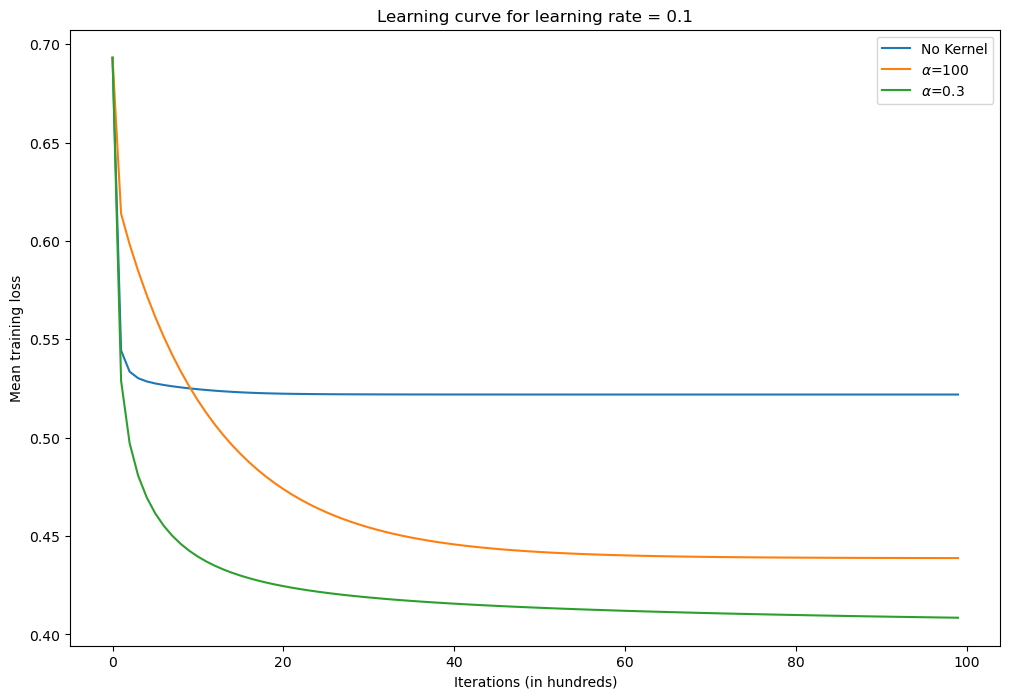

In [137]:
# Plot loss histories
loss_history1 = np.squeeze(d1['mean_loss_history'])
loss_history2 = np.squeeze(d2['mean_loss_history'])

plt.figure(figsize=(12,8))
plt.ylabel('Mean training loss')
plt.xlabel('Iterations (in hundreds)')
plt.title('Learning curve for learning rate = ' + str(d['learning_rate']))
plt.plot(loss_history, label='No Kernel')
plt.plot(loss_history1, label=r'$\alpha$=100')
plt.plot(loss_history2, label=r'$\alpha$=0.3')
plt.legend()

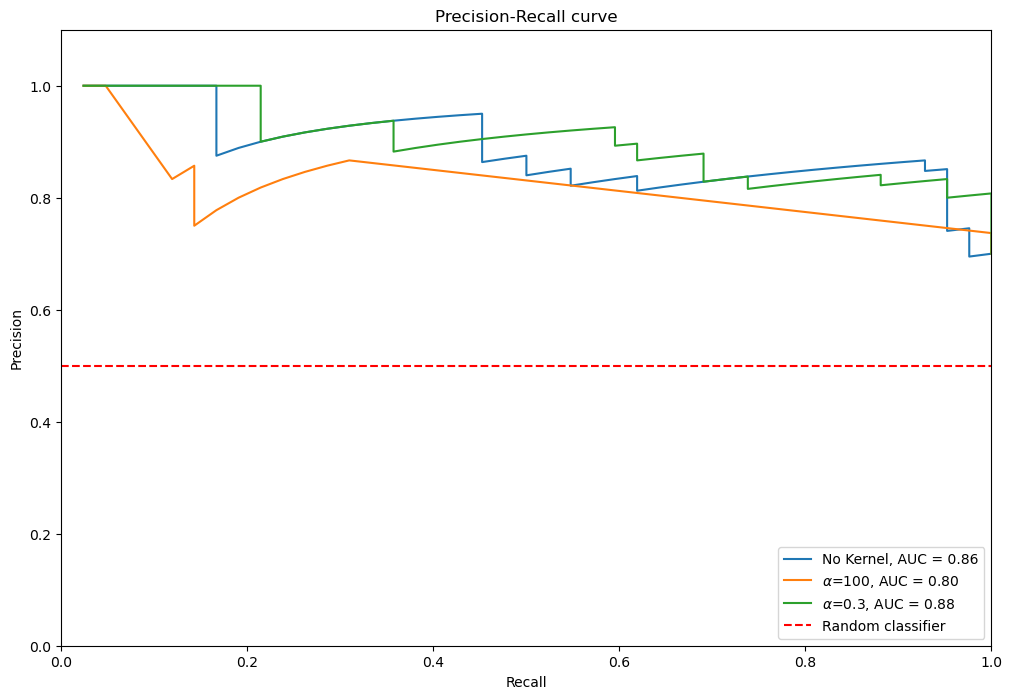

In [138]:
# Plot PR curves
y_log = predict_log(X_test_std, d['beta'], d['beta0'])
auc, precision, recall, th = pr_curve(y_test_01, y_log)

K_test1 = kernel_matrix(X_test_std, X_train_std, alphas[0])
y_log1 = predict_log(K_test1, d1['u'], d1['u0'])
auc1, precision1, recall1, th1 = pr_curve(y_test_01, y_log1)

K_test2 = kernel_matrix(X_test_std, X_train_std, alphas[1])
y_log2 = predict_log(K_test2, d2['u'], d2['u0'])
auc2, precision2, recall2, th2 = pr_curve(y_test_01, y_log2)

plt.figure(figsize=(12,8))
plt.title(f'Precision-Recall curve')
plt.plot(recall, precision, label=f'No Kernel, AUC = {auc:0.2f}')
plt.plot(recall1, precision1, label=fr'$\alpha$=100, AUC = {auc1:0.2f}')
plt.plot(recall2, precision2, label=fr'$\alpha$=0.3, AUC = {auc2:0.2f}')
plt.plot([0, 1], [0.5, 0.5], 'r--', label='Random classifier')
plt.legend(loc='lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


We observe all our models perform well compared to a random classifier. When we set $\alpha=100$, the kernelised version of logistic regression appears to perform worse than original penalised model from earlier. The $\alpha=100$ curve generally lies below the no kernel curve, and the AUC score is lower. However when we set $\alpha=0.3$, this model appears to slightly outperform the initial model shown by the slightly higher AUC score of `0.88` compared to `0.86` with the standard model, and the curves are quite close.